### Data Visualization For Windspeed

In [177]:
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
import numpy as np # type: ignore

In [178]:
# LOAD FROM CSV TO PANDAS
real_wind_df = pd.read_csv('real-data/real_windspeed.csv')

# SHOW DATA
real_wind_df.head(5)

PCTimeStamp HD01_Ambient WindSpeed Avg. (1)  \
0  2024-04-01 0:00:00+07:00                           4.293   
1  2024-04-01 0:10:00+07:00                           3.566   
2  2024-04-01 0:20:00+07:00                           3.898   
3  2024-04-01 0:30:00+07:00                           3.762   
4  2024-04-01 0:40:00+07:00                           3.691   

  HD02_Ambient WindSpeed Avg. (2) HD03_Ambient WindSpeed Avg. (3)  \
0                           3.012                           4.535   
1                             1.5                           3.102   
2                           1.965                           1.863   
3                           3.242                           2.824   
4                           3.902                           2.176   

  HD04_Ambient WindSpeed Avg. (4) HD05_Ambient WindSpeed Avg. (5)  \
0                           3.637                           4.395   
1                           2.543                           3.117   
2                           2.402                            2.41   
3                           3.008                           2.254   
4                           3.512                           2.387   

  HD06_Ambient WindSpeed Avg. (6) HD07_Ambient WindSpeed Avg. (7)  \
0                           3.758                           3.484   
1                            3.23                           2.574   
2                           2.215                           1.832   
3                           2.461                           2.258   
4                           3.168                           3.094   

   HD08_Ambient WindSpeed Avg. (8)  
0                            3.262  
1                            2.766  
2                            2.148  
3                            2.207  
4                            2.207

In [179]:
# PREPROCESS: CONVERT DATETIME TYPE, TIMEZONE, NUMERIC TYPE

# Convert to PCTimeStamp field to datetime type
real_wind_df['PCTimeStamp'] = pd.to_datetime(real_wind_df['PCTimeStamp'])

# Convert from Local Timezone to UTC
real_wind_df['PCTimeStamp'] = real_wind_df['PCTimeStamp'].dt.tz_convert('UTC')

# Convert some columns to numeric type
numeric_columns = ['HD01_Ambient WindSpeed Avg. (1)', 'HD02_Ambient WindSpeed Avg. (2)', 'HD03_Ambient WindSpeed Avg. (3)', 'HD04_Ambient WindSpeed Avg. (4)', 'HD05_Ambient WindSpeed Avg. (5)', 'HD06_Ambient WindSpeed Avg. (6)', 'HD07_Ambient WindSpeed Avg. (7)', 'HD08_Ambient WindSpeed Avg. (8)']
real_wind_df[numeric_columns] = real_wind_df[numeric_columns].apply(pd.to_numeric, errors='coerce', axis=1)

In [180]:
# CHECK DATA AFTER PREPROCESSING
real_wind_df.head(5)

PCTimeStamp  HD01_Ambient WindSpeed Avg. (1)  \
0 2024-03-31 17:00:00+00:00                            4.293   
1 2024-03-31 17:10:00+00:00                            3.566   
2 2024-03-31 17:20:00+00:00                            3.898   
3 2024-03-31 17:30:00+00:00                            3.762   
4 2024-03-31 17:40:00+00:00                            3.691   

   HD02_Ambient WindSpeed Avg. (2)  HD03_Ambient WindSpeed Avg. (3)  \
0                            3.012                            4.535   
1                            1.500                            3.102   
2                            1.965                            1.863   
3                            3.242                            2.824   
4                            3.902                            2.176   

   HD04_Ambient WindSpeed Avg. (4)  HD05_Ambient WindSpeed Avg. (5)  \
0                            3.637                            4.395   
1                            2.543                            3.117   
2                            2.402                            2.410   
3                            3.008                            2.254   
4                            3.512                            2.387   

   HD06_Ambient WindSpeed Avg. (6)  HD07_Ambient WindSpeed Avg. (7)  \
0                            3.758                            3.484   
1                            3.230                            2.574   
2                            2.215                            1.832   
3                            2.461                            2.258   
4                            3.168                            3.094   

   HD08_Ambient WindSpeed Avg. (8)  
0                            3.262  
1                            2.766  
2                            2.148  
3                            2.207  
4                            2.207

In [181]:
# CHECK TYPE OF ALL COLUMNS
real_wind_df.dtypes

PCTimeStamp                        datetime64[ns, UTC]
HD01_Ambient WindSpeed Avg. (1)                float64
HD02_Ambient WindSpeed Avg. (2)                float64
HD03_Ambient WindSpeed Avg. (3)                float64
HD04_Ambient WindSpeed Avg. (4)                float64
HD05_Ambient WindSpeed Avg. (5)                float64
HD06_Ambient WindSpeed Avg. (6)                float64
HD07_Ambient WindSpeed Avg. (7)                float64
HD08_Ambient WindSpeed Avg. (8)                float64
dtype: object

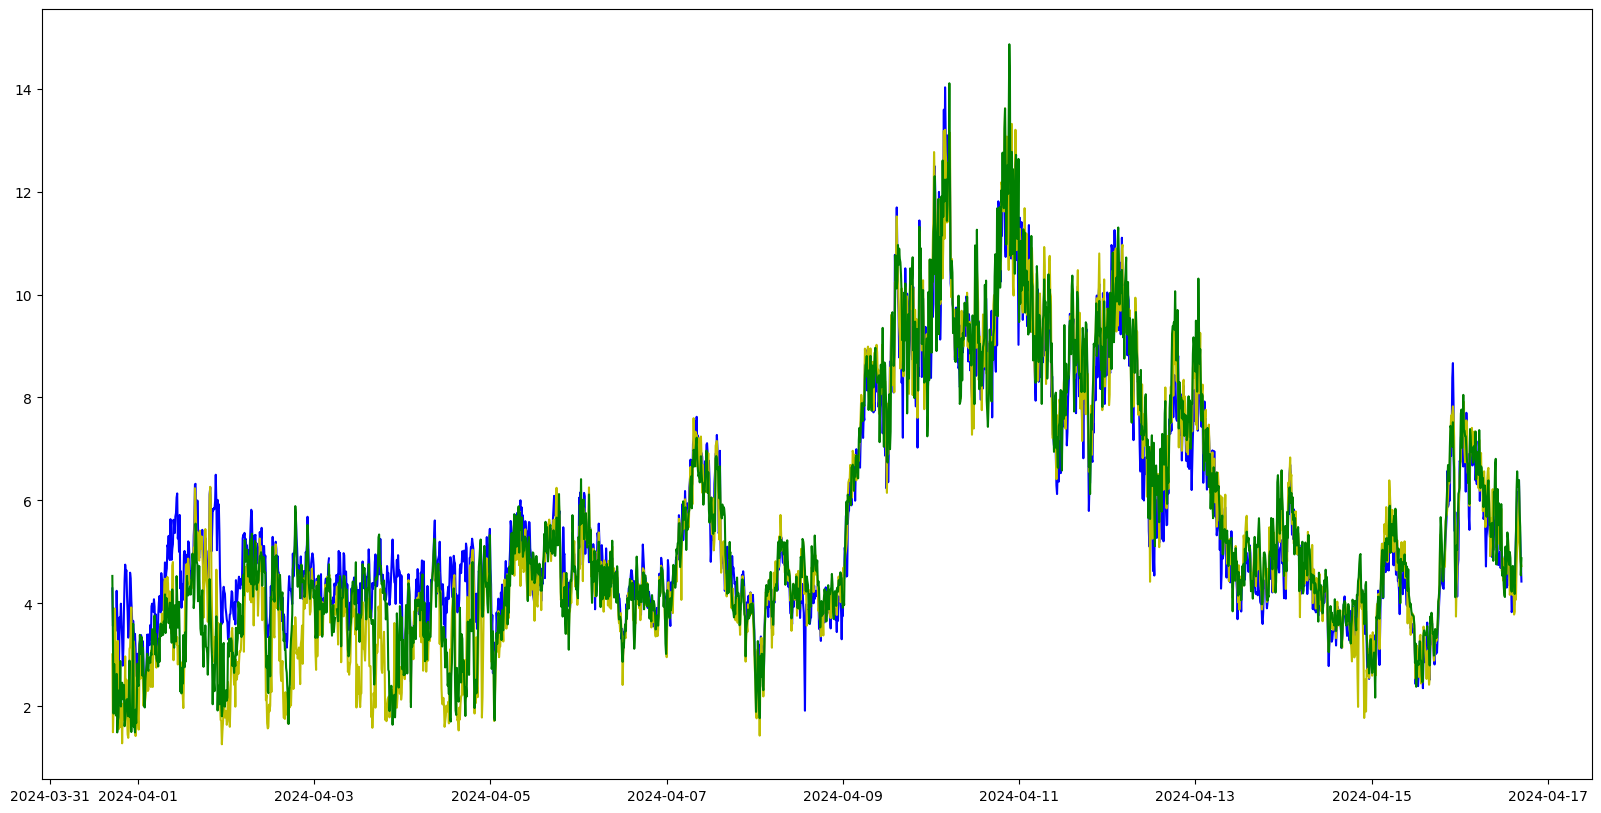

In [182]:
# VISUALIZE REAL DATA OF WINDSPEED ON TUABINS

plt.figure(1, figsize=(20, 10))
plt.plot(real_wind_df["PCTimeStamp"], real_wind_df["HD01_Ambient WindSpeed Avg. (1)"], "b")
plt.plot(real_wind_df["PCTimeStamp"], real_wind_df["HD02_Ambient WindSpeed Avg. (2)"], "y")
plt.plot(real_wind_df["PCTimeStamp"], real_wind_df["HD03_Ambient WindSpeed Avg. (3)"], "g")
plt.show()

### Data Visualization For Glass Forecast API

In [183]:
# LOAD FROM CSV TO PANDAS
glass_wind_df = pd.read_csv('csv/glass_forecast_100m.csv')

# SHOW DATA
glass_wind_df.head(5)

time  noaa    sg
0  2024-04-04T00:00:00+00:00  3.35  3.35
1  2024-04-04T01:00:00+00:00  3.75  3.75
2  2024-04-04T02:00:00+00:00  4.16  4.16
3  2024-04-04T03:00:00+00:00  4.56  4.56
4  2024-04-04T04:00:00+00:00  5.05  5.05

In [184]:
# PREPROCESS: CONVERT DATETIME TYPE, TIMEZONE, NUMERIC TYPE

# Convert to time field to datetime type
glass_wind_df['time'] = pd.to_datetime(glass_wind_df['time'])

# Convert some columns to numeric type
numeric_columns = ['noaa', 'sg']
glass_wind_df[numeric_columns] = glass_wind_df[numeric_columns].apply(pd.to_numeric, errors='coerce', axis=1)

In [185]:
# Set time field as index 
glass_wind_df.set_index('time', inplace=True)
glass_wind_df.head(5)

noaa    sg
time                                 
2024-04-04 00:00:00+00:00  3.35  3.35
2024-04-04 01:00:00+00:00  3.75  3.75
2024-04-04 02:00:00+00:00  4.16  4.16
2024-04-04 03:00:00+00:00  4.56  4.56
2024-04-04 04:00:00+00:00  5.05  5.05

In [186]:
glass_wind_df.index

DatetimeIndex(['2024-04-04 00:00:00+00:00', '2024-04-04 01:00:00+00:00',
               '2024-04-04 02:00:00+00:00', '2024-04-04 03:00:00+00:00',
               '2024-04-04 04:00:00+00:00', '2024-04-04 05:00:00+00:00',
               '2024-04-04 06:00:00+00:00', '2024-04-04 07:00:00+00:00',
               '2024-04-04 08:00:00+00:00', '2024-04-04 09:00:00+00:00',
               ...
               '2024-04-17 14:00:00+00:00', '2024-04-17 15:00:00+00:00',
               '2024-04-17 16:00:00+00:00', '2024-04-17 17:00:00+00:00',
               '2024-04-17 18:00:00+00:00', '2024-04-17 19:00:00+00:00',
               '2024-04-17 20:00:00+00:00', '2024-04-17 21:00:00+00:00',
               '2024-04-17 22:00:00+00:00', '2024-04-17 23:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='time', length=336, freq=None)

In [187]:
# Resample with 10-minute frequency and perform linear interpolation
glass_wind_df = glass_wind_df.resample('10T').interpolate(method='linear')
glass_wind_df.head(5)

/var/folders/3m/lrfnnq890n55hk28xnx6hswc0000gn/T/ipykernel_4987/1205144806.py:2: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  glass_wind_df = glass_wind_df.resample('10T').interpolate(method='linear')


noaa        sg
time                                         
2024-04-04 00:00:00+00:00  3.350000  3.350000
2024-04-04 00:10:00+00:00  3.416667  3.416667
2024-04-04 00:20:00+00:00  3.483333  3.483333
2024-04-04 00:30:00+00:00  3.550000  3.550000
2024-04-04 00:40:00+00:00  3.616667  3.616667

In [188]:
# Reset index to get 'time' back as a column
glass_wind_df.reset_index(inplace=True)
glass_wind_df.head(5)

time      noaa        sg
0 2024-04-04 00:00:00+00:00  3.350000  3.350000
1 2024-04-04 00:10:00+00:00  3.416667  3.416667
2 2024-04-04 00:20:00+00:00  3.483333  3.483333
3 2024-04-04 00:30:00+00:00  3.550000  3.550000
4 2024-04-04 00:40:00+00:00  3.616667  3.616667

In [189]:
# CHECK TYPE OF ALL COLUMNS
glass_wind_df.dtypes

time    datetime64[ns, UTC]
noaa                float64
sg                  float64
dtype: object

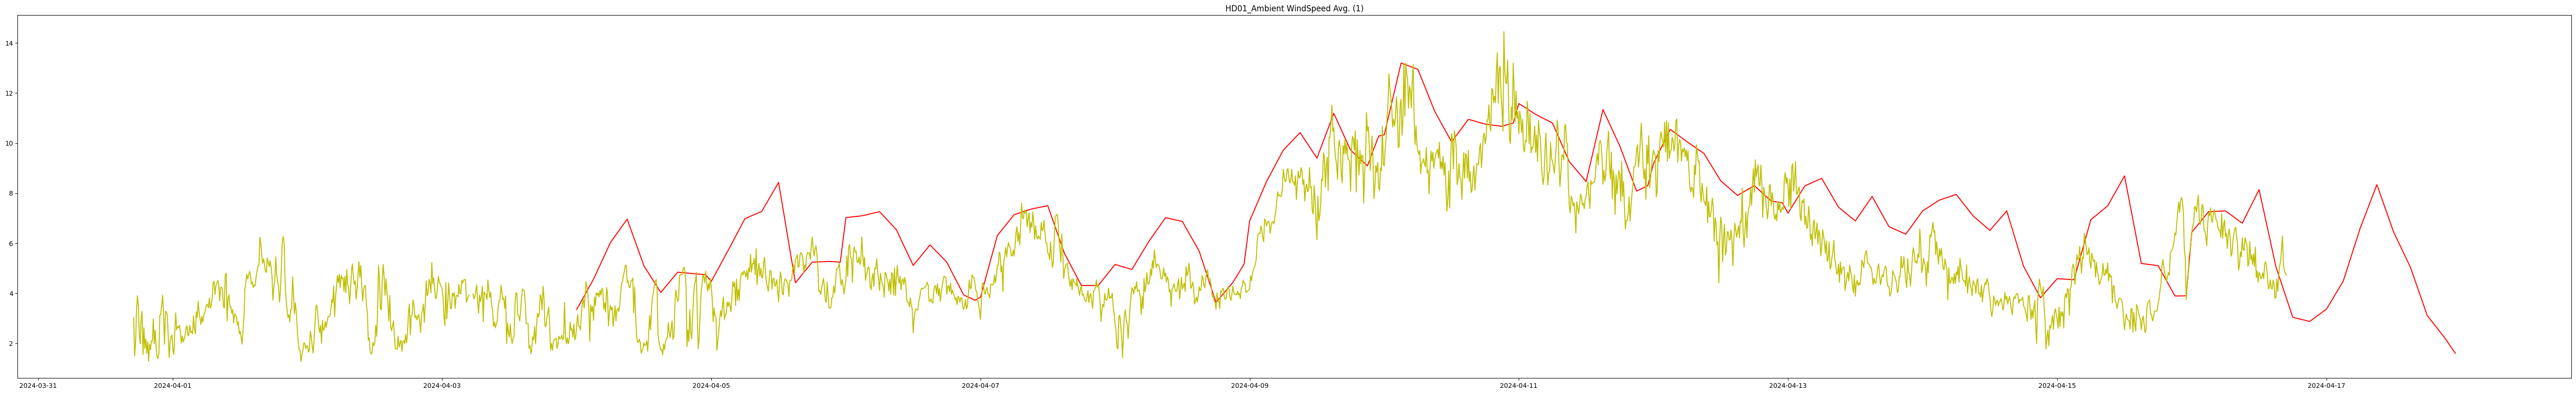

In [190]:
# VISUALIZE REAL DATA OF WINDSPEED ON TUABINS

plt.figure(1, figsize=(70, 10))
plt.plot(glass_wind_df["time"], glass_wind_df["noaa"], "r")
# plt.plot(glass_wind_df["time"], glass_wind_df["sg"], "r")

# plt.plot(real_wind_df["PCTimeStamp"], real_wind_df["HD01_Ambient WindSpeed Avg. (1)"], "y")
plt.plot(real_wind_df["PCTimeStamp"], real_wind_df["HD02_Ambient WindSpeed Avg. (2)"], "y")
# plt.plot(real_wind_df["PCTimeStamp"], real_wind_df["HD03_Ambient WindSpeed Avg. (3)"], "g")
# plt.plot(real_wind_df["PCTimeStamp"], real_wind_df["HD04_Ambient WindSpeed Avg. (4)"], "b")
plt.title("HD01_Ambient WindSpeed Avg. (1)")
plt.show()

In [191]:
# Filter realtime data from 2024-04-04 00:00:00+00:00 to 2024-04-16 16:50:00+00:00
real_wind_df = real_wind_df[real_wind_df["PCTimeStamp"] >= "2024-04-04 00:00:00+00:00"]
real_wind_df

PCTimeStamp  HD01_Ambient WindSpeed Avg. (1)  \
474  2024-04-04 00:00:00+00:00                            3.445   
475  2024-04-04 00:10:00+00:00                            3.109   
476  2024-04-04 00:20:00+00:00                            2.793   
477  2024-04-04 00:30:00+00:00                            2.977   
478  2024-04-04 00:40:00+00:00                            2.609   
...                        ...                              ...   
2299 2024-04-16 16:10:00+00:00                            6.391   
2300 2024-04-16 16:20:00+00:00                            5.691   
2301 2024-04-16 16:30:00+00:00                            5.273   
2302 2024-04-16 16:40:00+00:00                            4.852   
2303 2024-04-16 16:50:00+00:00                            4.426   

      HD02_Ambient WindSpeed Avg. (2)  HD03_Ambient WindSpeed Avg. (3)  \
474                             2.730                            2.723   
475                             3.148                            3.293   
476                             2.684                            2.609   
477                             2.680                            2.641   
478                             2.531                            2.617   
...                               ...                              ...   
2299                            6.281                            6.395   
2300                            5.180                            5.773   
2301                            4.910                            5.484   
2302                            4.797                            4.547   
2303                            4.727                            4.879   

      HD04_Ambient WindSpeed Avg. (4)  HD05_Ambient WindSpeed Avg. (5)  \
474                             2.145                            2.996   
475                             3.375                            2.789   
476                             2.918                            2.445   
477                             2.918                            2.270   
478                             2.527                            2.840   
...                               ...                              ...   
2299                            6.145                            5.570   
2300                            5.602                            5.578   
2301                            4.902                            5.121   
2302                            4.355                            4.516   
2303                            4.926                            5.637   

      HD06_Ambient WindSpeed Avg. (6)  HD07_Ambient WindSpeed Avg. (7)  \
474                             2.672                            2.941   
475                             2.637                            3.152   
476                             2.938                            2.820   
477                             2.598                            2.313   
478                             2.539                            2.316   
...                               ...                              ...   
2299                            5.563                            5.777   
2300                            5.156                            5.461   
2301                            5.047                            4.891   
2302                            5.277                            5.594   
2303                            5.371                            5.289   

      HD08_Ambient WindSpeed Avg. (8)  
474                             3.324  
475                             3.063  
476                             2.457  
477                             2.277  
478                             2.492  
...                               ...  
2299                            6.043  
2300                            5.848  
2301                            5.098  
2302                            5.434  
2303                            4.723  

[1830 rows x 9 columns]

In [192]:
# Filter glass-forecast data from 2024-04-04 00:00:00+00:00 to 2024-04-16 16:50:00+00:00
glass_wind_df = glass_wind_df[glass_wind_df["time"] <= "2024-04-16 16:50:00+00:00"]
glass_wind_df

time      noaa        sg
0    2024-04-04 00:00:00+00:00  3.350000  3.350000
1    2024-04-04 00:10:00+00:00  3.416667  3.416667
2    2024-04-04 00:20:00+00:00  3.483333  3.483333
3    2024-04-04 00:30:00+00:00  3.550000  3.550000
4    2024-04-04 00:40:00+00:00  3.616667  3.616667
...                        ...       ...       ...
1825 2024-04-16 16:10:00+00:00  4.276667  4.276667
1826 2024-04-16 16:20:00+00:00  4.163333  4.163333
1827 2024-04-16 16:30:00+00:00  4.050000  4.050000
1828 2024-04-16 16:40:00+00:00  3.936667  3.936667
1829 2024-04-16 16:50:00+00:00  3.823333  3.823333

[1830 rows x 3 columns]

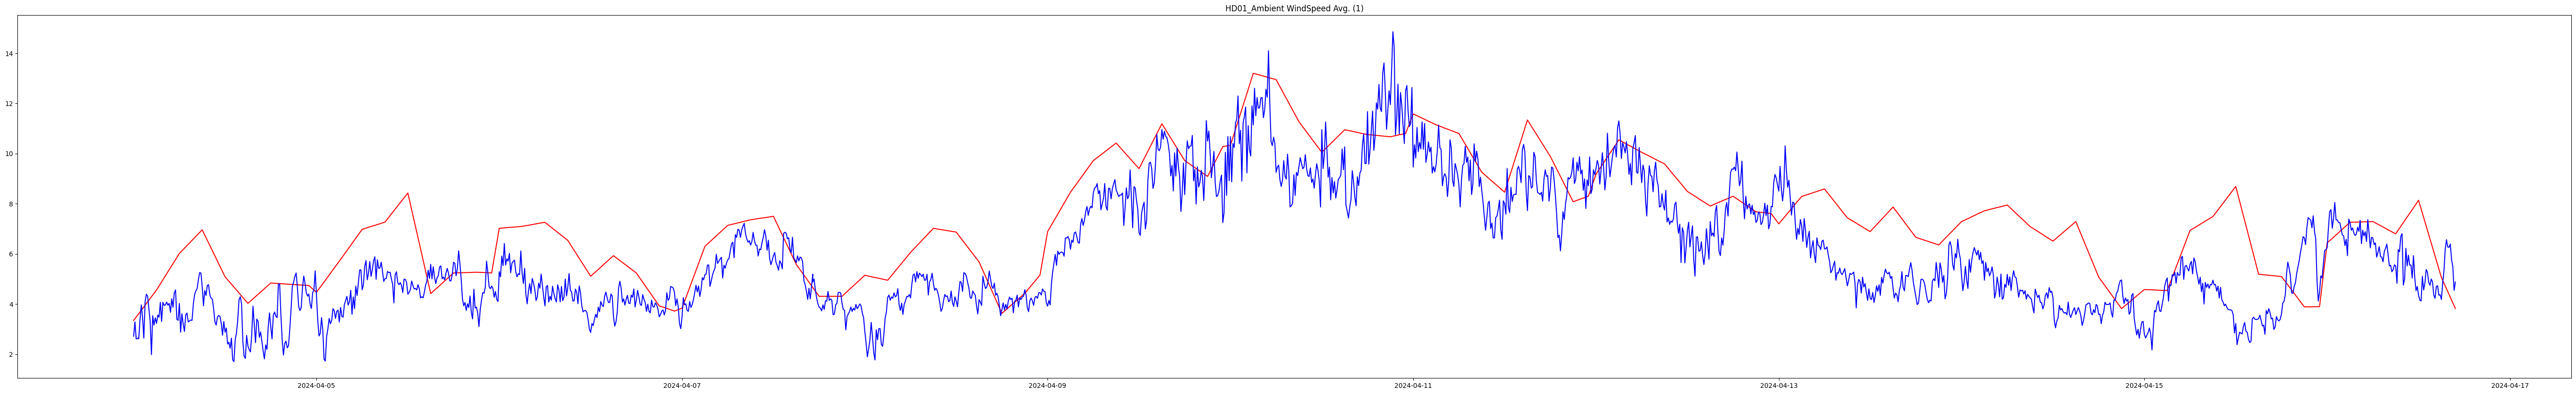

In [193]:
# VISUALIZE REAL DATA OF WINDSPEED ON TUABINS

plt.figure(1, figsize=(70, 10))
plt.plot(glass_wind_df["time"], glass_wind_df["noaa"], "r")

plt.plot(real_wind_df["PCTimeStamp"], real_wind_df["HD03_Ambient WindSpeed Avg. (3)"], "b")
plt.title("HD01_Ambient WindSpeed Avg. (1)")
plt.show()

In [194]:
print(len(glass_wind_df))
print(len(real_wind_df))

1830
1830


In [195]:
split_index = 1800
test_real_wind_df = real_wind_df[split_index:]
real_wind_df = real_wind_df[:split_index]
y_test = np.array(test_real_wind_df)

test_glass_wind_df = glass_wind_df[split_index:]
glass_wind_df = glass_wind_df[:split_index]

X_test = np.array(test_glass_wind_df["noaa"]).copy()
X_test = X_test.reshape(-1, 1)



In [196]:
# CHOOSE ACTUAL WINDSPEEDS

actual_windspeeds = np.array(real_wind_df["HD01_Ambient WindSpeed Avg. (1)"])
test_actual_windspeeds = np.array(test_real_wind_df["HD01_Ambient WindSpeed Avg. (1)"])

# actual_windspeeds = np.array(real_wind_df["HD02_Ambient WindSpeed Avg. (2)"])
# test_actual_windspeeds = np.array(test_real_wind_df["HD02_Ambient WindSpeed Avg. (2)"])

# actual_windspeeds = np.array(real_wind_df["HD03_Ambient WindSpeed Avg. (3)"])
# test_actual_windspeeds = np.array(test_real_wind_df["HD03_Ambient WindSpeed Avg. (3)"])

# actual_windspeeds = np.array(real_wind_df["HD04_Ambient WindSpeed Avg. (4)"])
# test_actual_windspeeds = np.array(test_real_wind_df["HD04_Ambient WindSpeed Avg. (4)"])

# actual_windspeeds = np.array(real_wind_df["HD05_Ambient WindSpeed Avg. (5)"])
# test_actual_windspeeds = np.array(test_real_wind_df["HD05_Ambient WindSpeed Avg. (5)"])

# actual_windspeeds = np.array(real_wind_df["HD06_Ambient WindSpeed Avg. (6)"])
# test_actual_windspeeds = np.array(test_real_wind_df["HD06_Ambient WindSpeed Avg. (6)"])

# actual_windspeeds = np.array(real_wind_df["HD07_Ambient WindSpeed Avg. (7)"])
# test_actual_windspeeds = np.array(test_real_wind_df["HD07_Ambient WindSpeed Avg. (7)"])

# actual_windspeeds = np.array(real_wind_df["HD08_Ambient WindSpeed Avg. (8)"])
# test_actual_windspeeds = np.array(test_real_wind_df["HD08_Ambient WindSpeed Avg. (8)"])


# CHOOSE PREDICTED WINDSPEED
predicted_windspeeds = np.array(glass_wind_df["noaa"])
test_predicted_windspeeds = np.array(test_glass_wind_df["noaa"])

In [197]:
print(test_predicted_windspeeds.shape)

(30,)


===== PLOT BETWEEN: DESAMPLE ACTUAL WINDSPEED TO BE MORE NOT CHANGING SO MUCH 



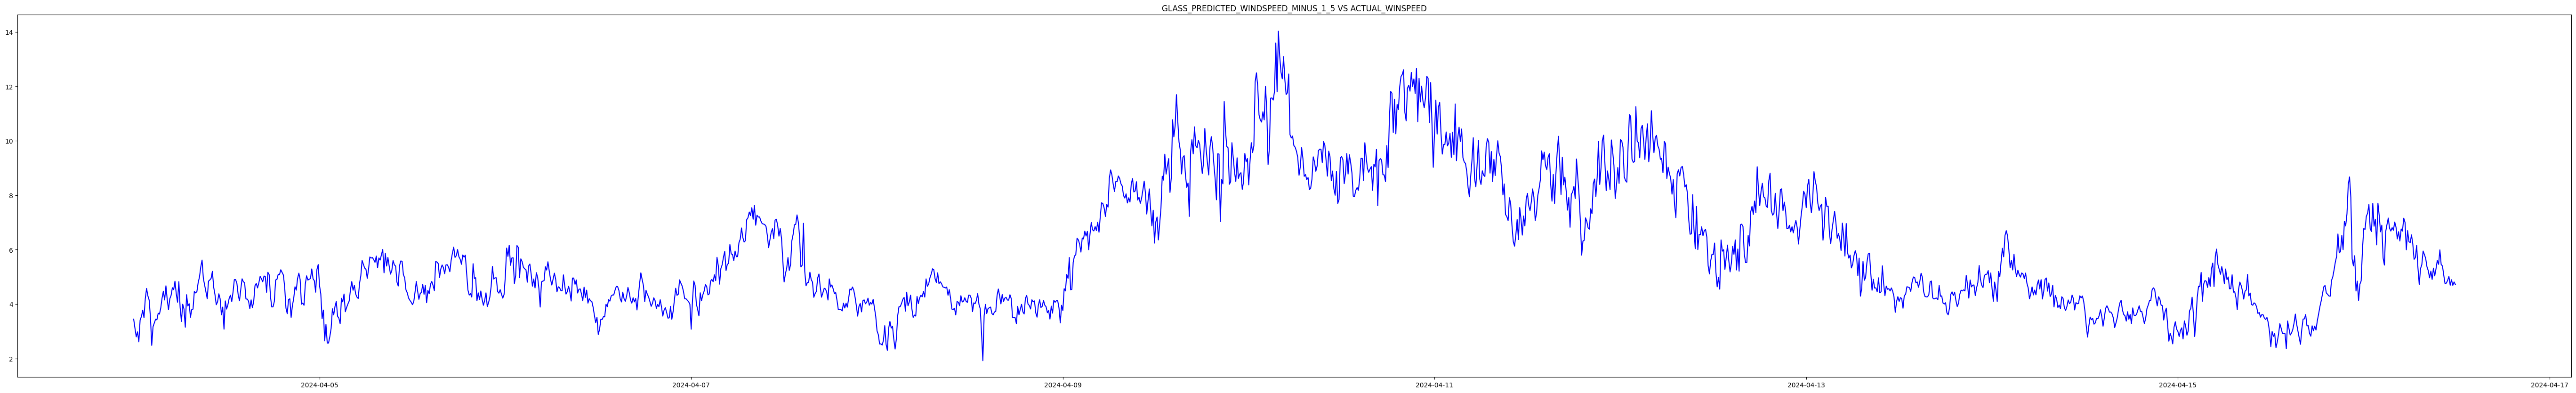

In [198]:
print("===== PLOT BETWEEN: DESAMPLE ACTUAL WINDSPEED TO BE MORE NOT CHANGING SO MUCH \n")

plt.figure(1, figsize=(70, 10))
# plt.plot(glass_wind_df["time"], predicted_windspeeds_minus_1_5, "r")

plt.plot(real_wind_df["PCTimeStamp"], actual_windspeeds, "b")
plt.title("GLASS_PREDICTED_WINDSPEED_MINUS_1_5 VS ACTUAL_WINSPEED")
plt.show()

In [199]:
stable_actual_windspeeds = actual_windspeeds.copy()

window = 20
for index in range(window, len(stable_actual_windspeeds), window):
    stable_actual_windspeeds[index-window:index] = stable_actual_windspeeds[index-window:index].mean()

print("stable_actual_windspeeds = ", stable_actual_windspeeds)

stable_actual_windspeeds =  [3.4665 3.4665 3.4665 ... 4.684  4.809  4.715 ]


===== PLOT BETWEEN: DESAMPLE ACTUAL WINDSPEED TO BE MORE NOT CHANGING SO MUCH 



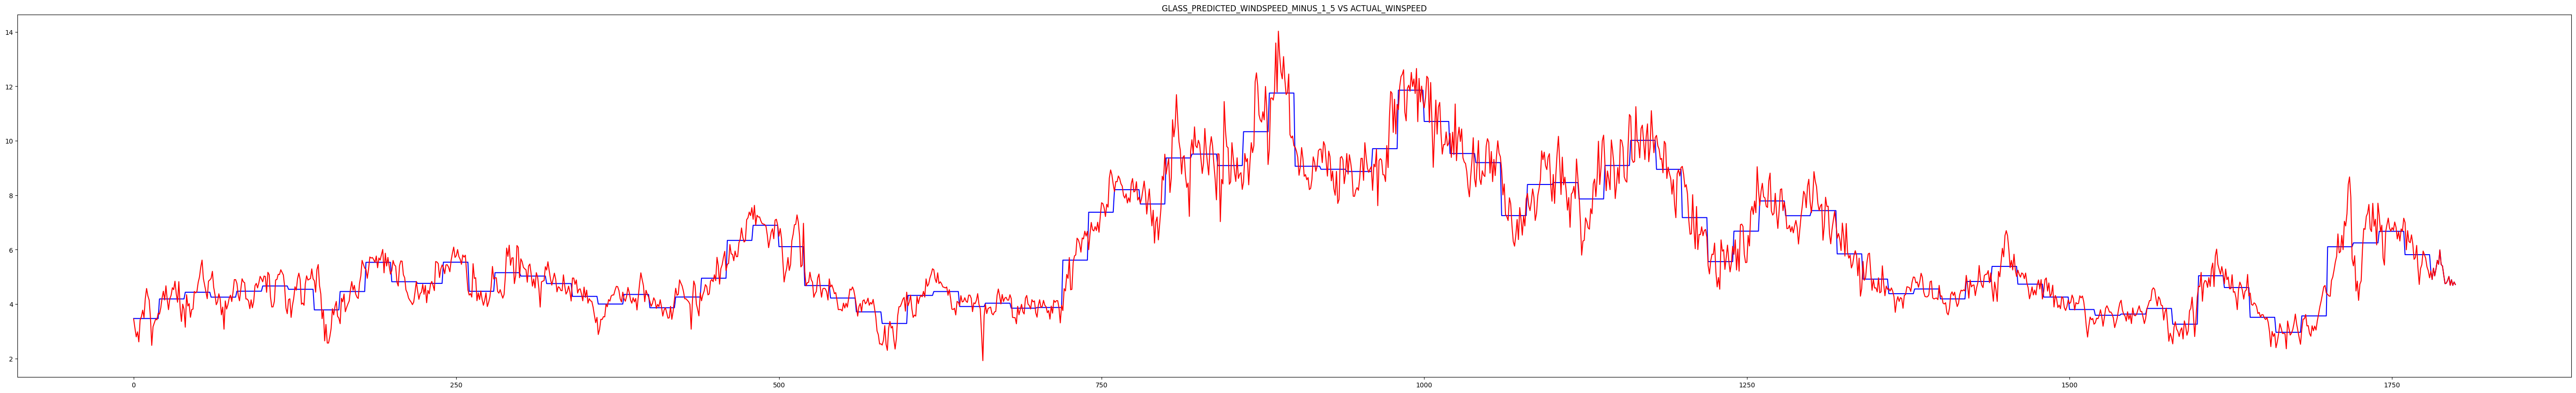

In [200]:
print("===== PLOT BETWEEN: DESAMPLE ACTUAL WINDSPEED TO BE MORE NOT CHANGING SO MUCH \n")

plt.figure(1, figsize=(70, 10))
# plt.plot(glass_wind_df["time"], predicted_windspeeds_minus_1_5, "r")

plt.plot(range(0, stable_actual_windspeeds.shape[0]), stable_actual_windspeeds, "b")
plt.plot(range(0, actual_windspeeds.shape[0]), actual_windspeeds, "r")
plt.title("GLASS_PREDICTED_WINDSPEED_MINUS_1_5 VS ACTUAL_WINSPEED")
plt.show()

In [201]:
# MEASURE ACCURARY BETWEEN: GLASS_PREDICTED_WINDSPEED VS ACTUAL_WINSPEED

print("===== MEASURE ACCURARY BETWEEN: GLASS_PREDICTED_WINDSPEED VS ACTUAL_WINSPEED \n")

import numpy as np
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error (MSE)
windspeed_mse_1 = mean_squared_error(actual_windspeeds, predicted_windspeeds)
print("Mean Squared Error (MSE):", windspeed_mse_1)

# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# windspeed_mape = mean_absolute_percentage_error(actual_windspeeds, predicted_windspeeds)
windspeed_mape_1 = mean_absolute_percentage_error(actual_windspeeds, predicted_windspeeds)
print("Mean Absolute Percentage Error (MAPE):", windspeed_mape_1)

===== MEASURE ACCURARY BETWEEN: GLASS_PREDICTED_WINDSPEED VS ACTUAL_WINSPEED 

Mean Squared Error (MSE): 3.5505351458024688
Mean Absolute Percentage Error (MAPE): 32.2228351753485


In [202]:
# Minus raw-forecast windspeed by 1.5
predicted_windspeeds_minus_1_5 = predicted_windspeeds-1.5

In [203]:
# MEASURE ACCURARY BETWEEN: GLASS_PREDICTED_WINDSPEED_MINUS_1_5 VS ACTUAL_WINSPEED

print("===== MEASURE ACCURARY BETWEEN: GLASS_PREDICTED_WINDSPEED_MINUS_1_5 VS ACTUAL_WINSPEED \n")

import numpy as np
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error (MSE)
windspeed_mse_2 = mean_squared_error(actual_windspeeds, predicted_windspeeds_minus_1_5)
print("Mean Squared Error (MSE):", windspeed_mse_2)

# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

windspeed_mape_2 = mean_absolute_percentage_error(actual_windspeeds, predicted_windspeeds_minus_1_5)
print("MAPE_minus_1_5:", windspeed_mape_2)

windspeed_mape_3 = mean_absolute_percentage_error(actual_windspeeds, predicted_windspeeds-1.26)
print("MAPE_minus_1_26:", windspeed_mape_3)

===== MEASURE ACCURARY BETWEEN: GLASS_PREDICTED_WINDSPEED_MINUS_1_5 VS ACTUAL_WINSPEED 

Mean Squared Error (MSE): 1.6836018124691357
MAPE_minus_1_5: 19.85113661840705
MAPE_minus_1_26: 20.351892371969075


In [204]:
import numpy as np

# Splitting 0 to 3 into increments of 0.1
result = np.arange(0, 3.1, 0.1)

best_value = None
best_error = 1000
for value in np.arange(0, 5.1, 0.1):
    mape_error = mean_absolute_percentage_error(actual_windspeeds, predicted_windspeeds-value)
    if mape_error < best_error:
        best_error = mape_error
        best_value = value

print("best_error = ", best_error)
print("best_value = ", best_value)

print("\n")

windspeed_mape_2 = mean_absolute_percentage_error(actual_windspeeds, predicted_windspeeds-best_value)
print("MAPE_TRAIN:", windspeed_mape_2)

windspeed_mape_2 = mean_absolute_percentage_error(test_actual_windspeeds, test_predicted_windspeeds-best_value)
print("MAPE_TEST:", windspeed_mape_2)

print("\n")

best_value = None
best_error = 1000
for value in np.arange(0, 5.1, 0.1):
    mape_error = mean_absolute_percentage_error(test_actual_windspeeds, test_predicted_windspeeds-value)
    if mape_error < best_error:
        best_error = mape_error
        best_value = value

print("best_error = ", best_error)
print("best_value = ", best_value)

best_error =  19.839614130873144
best_value =  1.6


MAPE_TRAIN: 19.839614130873144
MAPE_TEST: 28.679390595855146


best_error =  28.679390595855146
best_value =  1.6


In [205]:

# Find 
def find_best_threshold(start_index, stop_index):
    list_threshold = []
    list_error = []
    test_dict = {}
    best_threshold = None
    best_error = 1000
    for threshold in np.arange(-5, 5.1, 0.1):
        mape_error = mean_absolute_percentage_error(actual_windspeeds[start_index:stop_index], predicted_windspeeds[start_index:stop_index]-threshold)
        list_error.append(mape_error)
        list_threshold.append(threshold)
        test_dict[threshold] = mape_error
        if mape_error < best_error:
            best_error = mape_error
            best_threshold = threshold
    print(f"\nstart_index: stop_index = {start_index}:{stop_index}")
    print("best_error = ", best_error)
    print("best_threshold = ", best_threshold)
    # print("sorted_error = ", np.sort(np.array(list_error)))

    sorted_dict = dict(sorted(test_dict.items(), key=lambda item: item[1]))
    print(list(sorted_dict.items())[:10])

    sum =  0
    sum_weights = 0
    for (key, weight) in list(sorted_dict.items())[:10]:
        sum += key * 1.0/weight
        sum_weights += 1.0/weight

    print("average = ", sum/sum_weights)

    return best_threshold


start_index = 0
stop_index = -1
find_best_threshold(start_index, stop_index)

window_len = 10

print("\n========")
print(list(range(window_len, actual_windspeeds.shape[0], window_len)))

thres_predicted_windspeeds = predicted_windspeeds.copy()

for index in range(window_len, actual_windspeeds.shape[0], window_len):
    best_threshold = find_best_threshold(index-window_len, index)
    thres_predicted_windspeeds[index-window_len:index] -= best_threshold


start_index: stop_index = 0:-1
best_error =  19.830011032253722
best_threshold =  1.5999999999999766
[(1.5999999999999766, 19.830011032253722), (1.499999999999977, 19.84036099711584), (1.6999999999999762, 19.929464546467862), (1.3999999999999773, 19.959390757027546), (1.7999999999999758, 20.14559847675261), (1.2999999999999776, 20.206210570242014), (1.8999999999999755, 20.472960637402196), (1.199999999999978, 20.556741958181178), (1.9999999999999751, 20.944252185460495), (1.0999999999999783, 20.992489769589916)]
average =  1.5503424616727703

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910, 920

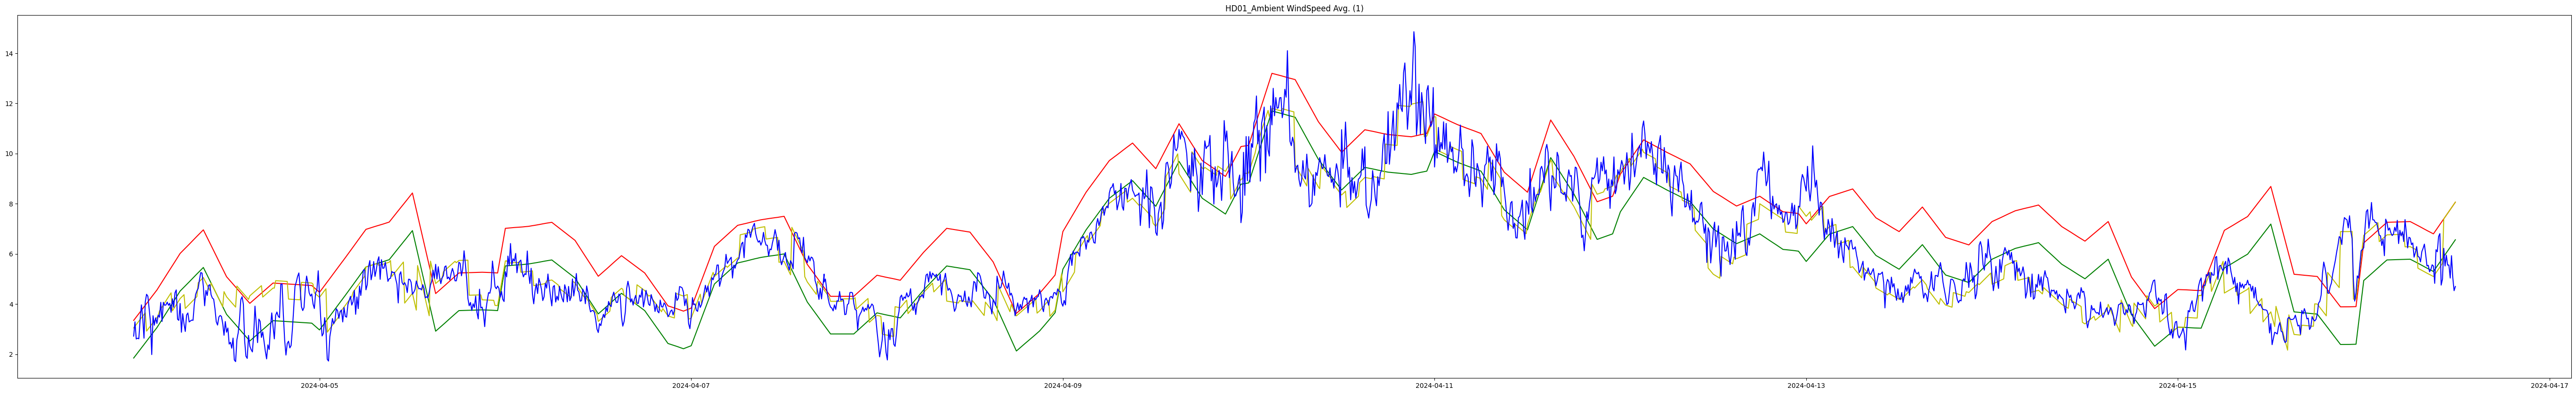

In [206]:
# VISUALIZE REAL DATA OF WINDSPEED ON TUABINS

plt.figure(1, figsize=(70, 10))
plt.plot(glass_wind_df["time"], glass_wind_df["noaa"], "r")
plt.plot(glass_wind_df["time"], glass_wind_df["noaa"]-1.5, "g")
plt.plot(glass_wind_df["time"], thres_predicted_windspeeds, "y")

plt.plot(real_wind_df["PCTimeStamp"], real_wind_df["HD03_Ambient WindSpeed Avg. (3)"], "b")
plt.title("HD01_Ambient WindSpeed Avg. (1)")
plt.show()

In [207]:
mape_error_thres = mean_absolute_percentage_error(actual_windspeeds[:], thres_predicted_windspeeds[:])
mape_error_minus_1_5 = mean_absolute_percentage_error(actual_windspeeds[:], predicted_windspeeds[:]-1.5)
print("mape_error_thres = ", mape_error_thres)
print("mape_error_minus_1_5 = ", mape_error_minus_1_5)

mape_error_thres =  7.299335043618102
mape_error_minus_1_5 =  19.85113661840705


===== PLOT BETWEEN: GLASS_PREDICTED_WINDSPEED_MINUS_1_5 VS ACTUAL_WINSPEED 



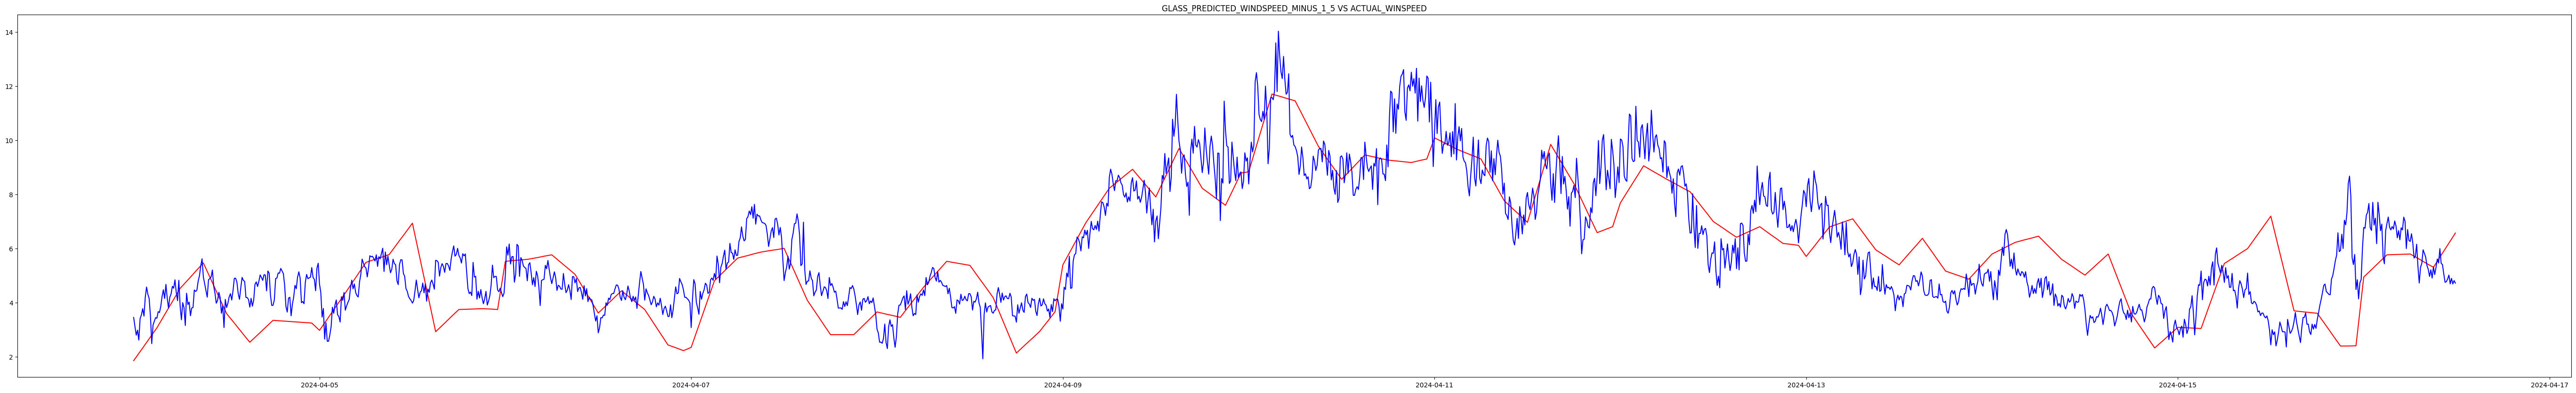

In [208]:
print("===== PLOT BETWEEN: GLASS_PREDICTED_WINDSPEED_MINUS_1_5 VS ACTUAL_WINSPEED \n")

plt.figure(1, figsize=(70, 10))
plt.plot(glass_wind_df["time"], predicted_windspeeds_minus_1_5, "r")

plt.plot(real_wind_df["PCTimeStamp"], actual_windspeeds, "b")
plt.title("GLASS_PREDICTED_WINDSPEED_MINUS_1_5 VS ACTUAL_WINSPEED")
plt.show()

In [209]:
print("actual_windspeeds = ", actual_windspeeds)
print("predicted_windspeeds = ", predicted_windspeeds)
print("predicted_windspeeds_minus_1_5 = ", predicted_windspeeds_minus_1_5)

actual_windspeeds =  [3.445 3.109 2.793 ... 4.684 4.809 4.715]
predicted_windspeeds =  [3.35       3.41666667 3.48333333 ... 7.915      7.99       8.065     ]
predicted_windspeeds_minus_1_5 =  [1.85       1.91666667 1.98333333 ... 6.415      6.49       6.565     ]


In [210]:
print("===== MEASURE: DIFFERENCE BETWEEN predicted_windspeeds VS actual_windspeeds \n")

difference = predicted_windspeeds - actual_windspeeds
print("difference.sum() = ", difference.sum())
print("predicted_windspeeds.shape[0] = ", predicted_windspeeds.shape[0])
print("Average Difference = ", difference.sum() / predicted_windspeeds.shape[0])

print("type(difference) = ", type(difference))
# print(difference)
sorted_data = np.sort(difference)[::-1]
print(sorted_data)

# Calculate the index for the top 50% and 75% of the largest values
index_50_percent = int(len(sorted_data) * 0.5)
index_75_percent = int(len(sorted_data) * 0.9)

# Calculate the averages
average_50_percent = np.mean(sorted_data[:index_50_percent])
average_75_percent = np.mean(sorted_data[:index_75_percent])

print("50% average of largest values:", average_50_percent)
print("75% average of largest values:", average_75_percent)

===== MEASURE: DIFFERENCE BETWEEN predicted_windspeeds VS actual_windspeeds 

difference.sum() =  2470.16
predicted_windspeeds.shape[0] =  1800
Average Difference =  1.372311111111111
type(difference) =  <class 'numpy.ndarray'>
[ 6.256       5.64633333  5.515      ... -4.02466667 -4.497
 -4.77633333]
50% average of largest values: 2.3981188888888885
75% average of largest values: 1.628020576131687


In [211]:
# ADJUST FORECASTING BY DIFFERENCE WINDOW ALGORITHM 

print("========= ADJUST FORECASTING BY DIFFERENCE WINDOW ALGORITHM \n")

# actual_windspeeds
glass_predicted_windspeeds = predicted_windspeeds
# glass_predicted_windspeeds = predicted_windspeeds_minus_1_5

adjust_windspeeds = []
past_window_length = 40
future_window_length = 20
array_length = glass_predicted_windspeeds.shape[0]

print("array_length = ", array_length)

def get_average_difference(source_array, start_index, stop_index):
    return source_array[start_index:stop_index].sum()

adjust_windspeeds += list(actual_windspeeds[:past_window_length])
print(adjust_windspeeds)

difference = np.array(glass_predicted_windspeeds[:past_window_length]) - np.array(adjust_windspeeds)

print("difference = ", difference)
print("===== len(adjust_windspeeds) = ", len(adjust_windspeeds))

print(list(range(past_window_length, array_length, future_window_length)))

for index in range(past_window_length, array_length, future_window_length):
    tempo_diff_average = get_average_difference(difference, index-past_window_length, index) / past_window_length
    # test_diff = (tempo_diff_average + 1.5) / 2
    # test_diff = 1.5
    test_diff = tempo_diff_average

    if index + future_window_length < array_length:
        adjust_windspeeds += list(glass_predicted_windspeeds[index:index+future_window_length]-test_diff)
        difference = np.array(glass_predicted_windspeeds[:index + future_window_length]) - np.array(adjust_windspeeds)[:index + future_window_length]
    else: 
        adjust_windspeeds += list(glass_predicted_windspeeds[index:array_length]-test_diff)
        difference = np.array(glass_predicted_windspeeds[:index + future_window_length]) - np.array(adjust_windspeeds)[:index + future_window_length]
    
    print("===== len(adjust_windspeeds) = ", len(adjust_windspeeds))
    print("tempo_diff_average = ", tempo_diff_average)

print("glass_predicted_windspeeds = ", glass_predicted_windspeeds)
print("adjust_windspeeds = ", adjust_windspeeds)
print("len(adjust_windspeeds) = ", len(adjust_windspeeds))

========= ADJUST FORECASTING BY DIFFERENCE WINDOW ALGORITHM 

array_length =  1800
[3.445, 3.109, 2.793, 2.977, 2.609, 3.41, 3.539, 3.773, 3.496, 4.195, 4.57, 4.301, 4.145, 3.5, 2.48, 3.164, 3.305, 3.441, 3.418, 3.66, 3.629, 3.855, 4.215, 4.469, 4.148, 4.668, 4.16, 3.793, 4.191, 4.316, 4.598, 4.527, 4.836, 4.375, 4.066, 4.82, 3.875, 3.359, 3.992, 3.813]
difference =  [-0.095       0.30766667  0.69033333  0.573       1.00766667  0.27333333
  0.211       0.04533333  0.39066667 -0.24       -0.54666667 -0.20933333
  0.015       0.72666667  1.81333333  1.196       1.12166667  1.05233333
  1.142       0.98166667  1.09433333  0.95        0.67166667  0.49933333
  0.902       0.462       1.05        1.497       1.179       1.134
  0.932       1.08466667  0.85733333  1.4         1.79066667  1.11833333
  2.145       2.71266667  2.13133333  2.362     ]
===== len(adjust_windspeeds) =  40
[40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460, 480,

===== PLOT BETWEEN: GLASS_PREDICTED_WINDSPEED_MINUS_1_5 (RED) VS ADJUST_WINDSPEED (GREEN) VS ACTUAL_WINSPEED (BLUE) 



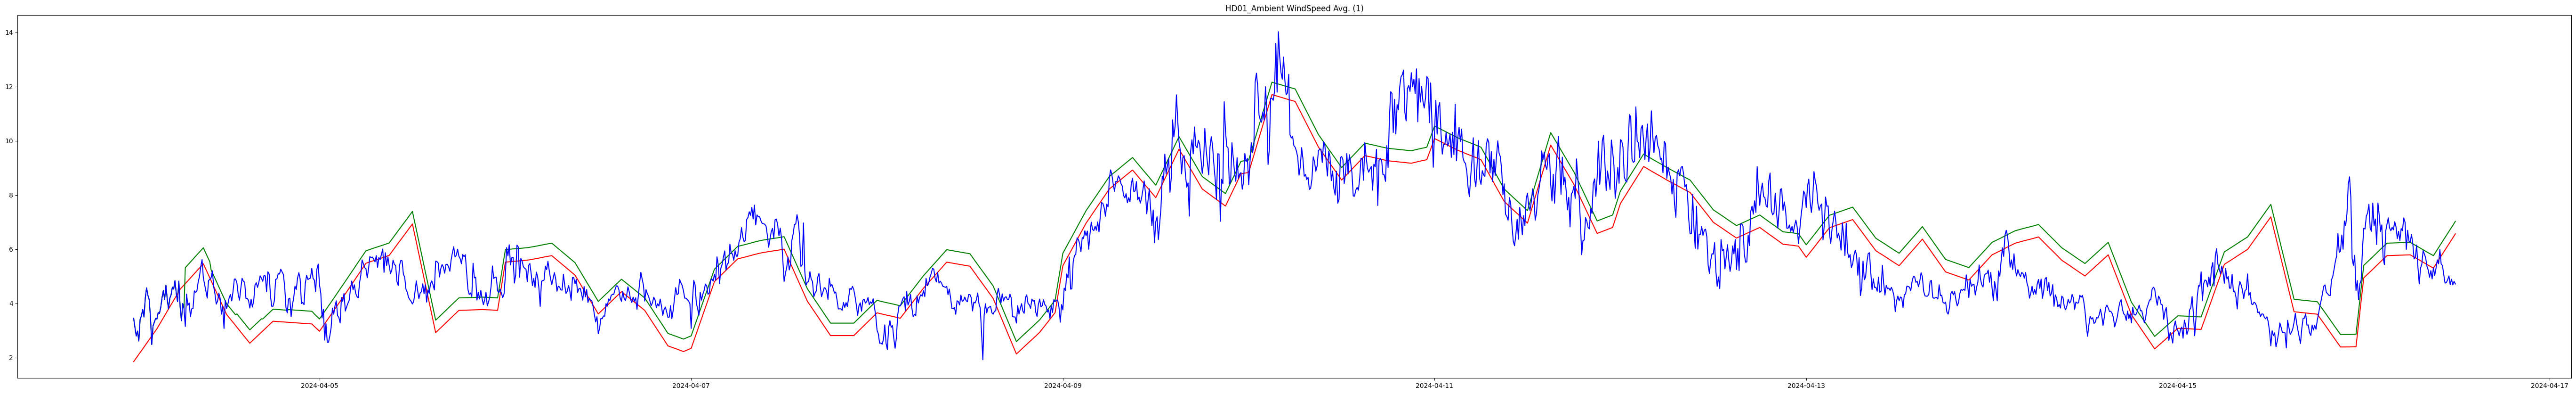

In [212]:
print("===== PLOT BETWEEN: GLASS_PREDICTED_WINDSPEED_MINUS_1_5 (RED) VS ADJUST_WINDSPEED (GREEN) VS ACTUAL_WINSPEED (BLUE) \n")

adjust_windspeeds = np.array(adjust_windspeeds)

plt.figure(1, figsize=(70, 10))
plt.plot(glass_wind_df["time"], glass_wind_df["noaa"]-1.5, "r")
plt.plot(glass_wind_df["time"], adjust_windspeeds, "g") 

plt.plot(real_wind_df["PCTimeStamp"], actual_windspeeds, "b")
plt.title("HD01_Ambient WindSpeed Avg. (1)")
plt.show()

In [213]:
print("===== MEASURE ACCURARY BETWEEN: ADJUST_WINDSPEED VS ACTUAL_WINSPEED \n")

import numpy as np
from sklearn.metrics import mean_squared_error

adjust_windspeeds = np.array(adjust_windspeeds)

# Calculate Mean Squared Error (MSE)
windspeed_mse = mean_squared_error(actual_windspeeds, adjust_windspeeds)
print("Mean Squared Error (MSE):", windspeed_mse)

# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

windspeed_mape = mean_absolute_percentage_error(actual_windspeeds, adjust_windspeeds)
print("Mean Absolute Percentage Error (MAPE):", windspeed_mape)

===== MEASURE ACCURARY BETWEEN: ADJUST_WINDSPEED VS ACTUAL_WINSPEED 

Mean Squared Error (MSE): 1.7686662106348645
Mean Absolute Percentage Error (MAPE): 21.025722558348953


In [214]:
import numpy as np
from sklearn.metrics import mean_squared_error

adjust_windspeeds = np.array(adjust_windspeeds)

length = len(actual_windspeeds)

# Calculate Mean Squared Error (MSE)
windspeed_mse = mean_squared_error(actual_windspeeds, adjust_windspeeds)
print("Mean Squared Error (MSE):", windspeed_mse)

# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# windspeed_mape = mean_absolute_percentage_error(actual_windspeeds[:length//2], adjust_windspeeds[:length//2])
windspeed_mape_minus_1_5 = mean_absolute_percentage_error(actual_windspeeds, predicted_windspeeds_minus_1_5)
print("\nMAPE_GLASS_MINUS_1_5 = ", windspeed_mape_minus_1_5)

windspeed_mape_adjust = mean_absolute_percentage_error(actual_windspeeds, adjust_windspeeds)
print("MAPE_GLASS_ADJUSTED = ", windspeed_mape_adjust)

windspeed_mape_minus_1_5_one_third_length = mean_absolute_percentage_error(actual_windspeeds[:length//3], predicted_windspeeds_minus_1_5[:length//3])
print("\nMAPE_GLASS_MINUS_1_5_ONE_THIRD_LENGTH = ", windspeed_mape_minus_1_5_one_third_length)

windspeed_mape_adjust_one_third_length = mean_absolute_percentage_error(actual_windspeeds[:length//3], adjust_windspeeds[:length//3])
print("MAPE_GLASS_ADJUSTED_ONE_THIRD_LENGTH = ", windspeed_mape_adjust_one_third_length)

windspeed_mape_minus_1_5_half_length = mean_absolute_percentage_error(actual_windspeeds[:length//2], predicted_windspeeds_minus_1_5[:length//2])
print("\nMAPE_GLASS_MINUS_1_5_HALF_LENGTH = ", windspeed_mape_minus_1_5_half_length)

windspeed_mape_adjust_half_length = mean_absolute_percentage_error(actual_windspeeds[:length//2], adjust_windspeeds[:length//2])
print("MAPE_GLASS_ADJUSTED_HALF_LENGTH = ", windspeed_mape_adjust_half_length)

windspeed_mape_minus_1_5_full = mean_absolute_percentage_error(actual_windspeeds[:], predicted_windspeeds_minus_1_5[:])
print("\nMAPE_GLASS_MINUS_1_5_FULL = ", windspeed_mape_minus_1_5_full)

windspeed_mape_adjust_full = mean_absolute_percentage_error(actual_windspeeds[:], adjust_windspeeds[:])
print("MAPE_GLASS_ADJUSTED_FULL = ", windspeed_mape_adjust_full)


Mean Squared Error (MSE): 1.7686662106348645

MAPE_GLASS_MINUS_1_5 =  19.85113661840705
MAPE_GLASS_ADJUSTED =  21.025722558348953

MAPE_GLASS_MINUS_1_5_ONE_THIRD_LENGTH =  19.7522611259404
MAPE_GLASS_ADJUSTED_ONE_THIRD_LENGTH =  17.529023892860387

MAPE_GLASS_MINUS_1_5_HALF_LENGTH =  18.093434522812956
MAPE_GLASS_ADJUSTED_HALF_LENGTH =  17.28053379458081

MAPE_GLASS_MINUS_1_5_FULL =  19.85113661840705
MAPE_GLASS_ADJUSTED_FULL =  21.025722558348953


In [215]:
# IMPLEMENT LINEAR REGRESSION
print("======== IMPLEMENT LINEAR REGRESSION \n")

y = actual_windspeeds.copy()
y_stable = stable_actual_windspeeds.copy()
X = predicted_windspeeds.copy()

# Reshape actual_windspeeds_lr from (N,) to (N, 1)
X = X.reshape(-1, 1)
print("X = ", X)
print("y = ", y)

from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X, y)

# Get the coefficients (weights)
lr_coefficients = lr_model.coef_

# Get the intercept
lr_intercept = lr_model.intercept_

print("\nLR Coefficients:", lr_coefficients)
print("LR Intercept:", lr_intercept)

y_predict_lr = lr_model.predict(X)
print("\ny_predict_lr = ", y_predict_lr)

======== IMPLEMENT LINEAR REGRESSION 

X =  [[3.35      ]
 [3.41666667]
 [3.48333333]
 ...
 [7.915     ]
 [7.99      ]
 [8.065     ]]
y =  [3.445 3.109 2.793 ... 4.684 4.809 4.715]

LR Coefficients: [0.86612178]
LR Intercept: -0.39566241443999584

y_predict_lr =  [2.50584554 2.56358699 2.62132844 ... 6.45969146 6.52465059 6.58960972]


===== PLOT BETWEEN: GLASS_PREDICTED_WINDSPEED_MINUS_1_5 (RED) VS ADJUST_WINDSPEED (GREEN) VS ACTUAL_WINSPEED (BLUE) 



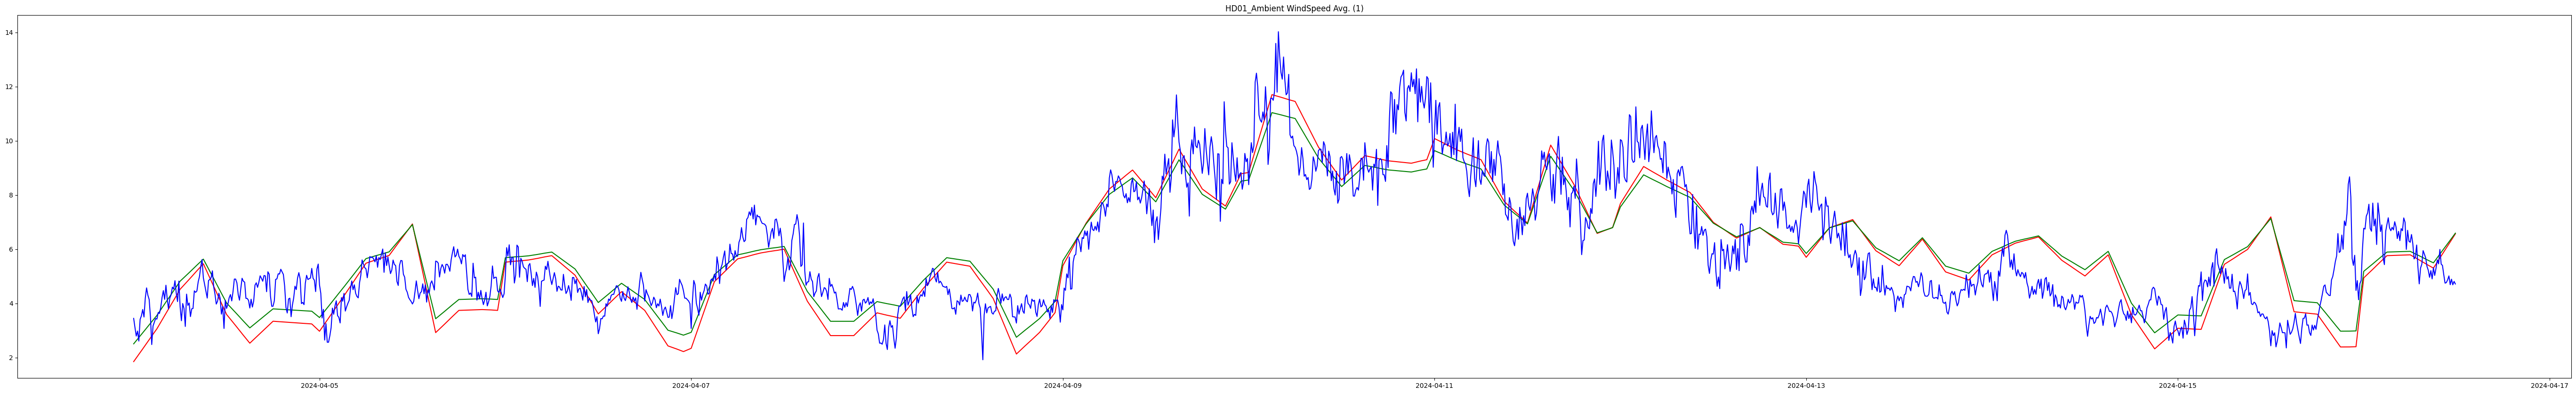

In [216]:
print("===== PLOT BETWEEN: GLASS_PREDICTED_WINDSPEED_MINUS_1_5 (RED) VS ADJUST_WINDSPEED (GREEN) VS ACTUAL_WINSPEED (BLUE) \n")

plt.figure(1, figsize=(70, 10))
plt.plot(glass_wind_df["time"], glass_wind_df["noaa"]-1.5, "r")
plt.plot(glass_wind_df["time"], y_predict_lr, "g") 

plt.plot(real_wind_df["PCTimeStamp"], actual_windspeeds, "b")
plt.title("HD01_Ambient WindSpeed Avg. (1)")
plt.show()

In [217]:
print("===== MEASURE ACCURARY BETWEEN: LR_WINDSPEED VS GLASS_WINDSPEED VS ACTUAL_WINSPEED \n")

import numpy as np
from sklearn.metrics import mean_squared_error

adjust_windspeeds = np.array(adjust_windspeeds)

# Calculate Mean Squared Error (MSE)
windspeed_mse = mean_squared_error(actual_windspeeds, y_predict_lr)
print("Mean Squared Error (MSE):", windspeed_mse)

# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

windspeed_mape_glass_minus_1_5 = mean_absolute_percentage_error(actual_windspeeds, predicted_windspeeds_minus_1_5)
print("MAPE_GLASS_MINUS_1_5:", windspeed_mape_glass_minus_1_5)

lr_windspeed_mape = mean_absolute_percentage_error(actual_windspeeds, y_predict_lr)
print("MAPE_LR_ADUSTED:", lr_windspeed_mape)

partly_range = range(0,100)

windspeed_mape_minus_1_5 = mean_absolute_percentage_error(actual_windspeeds[partly_range], predicted_windspeeds_minus_1_5[partly_range])
print("\nMAPE_GLASS_MINUS_1_5_PARTLY = ", windspeed_mape_minus_1_5)

windspeed_mape_adjust = mean_absolute_percentage_error(actual_windspeeds[partly_range], adjust_windspeeds[partly_range])
print("MAPE_GLASS_ADJUSTED_PARTLY = ", windspeed_mape_adjust)

windspeed_mape_adjust = mean_absolute_percentage_error(actual_windspeeds[partly_range], y_predict_lr[partly_range])
print("LR_ADJUSTED_PARTLY = ", windspeed_mape_adjust)

===== MEASURE ACCURARY BETWEEN: LR_WINDSPEED VS GLASS_WINDSPEED VS ACTUAL_WINSPEED 

Mean Squared Error (MSE): 1.578701695395965
MAPE_GLASS_MINUS_1_5: 19.85113661840705
MAPE_LR_ADUSTED: 19.05848859722822

MAPE_GLASS_MINUS_1_5_PARTLY =  21.80358099357703
MAPE_GLASS_ADJUSTED_PARTLY =  13.864151425534581
LR_ADJUSTED_PARTLY =  17.010750640994353


In [218]:
print("======== LASSO REGRESSION")

from sklearn.linear_model import Lasso

# Create and fit Lasso Regression model
lasso_model = Lasso(alpha=0.0001)  # You can adjust alpha to control the strength of regularization
lasso_model.fit(X, y)

# Get the coefficients
lasso_coefficients = lasso_model.coef_

print("Coefficients:", lasso_coefficients)

lasso_intercept = lasso_model.intercept_

print("lasso_intercept = ", lasso_intercept)

======== LASSO REGRESSION
Coefficients: [0.86610155]
lasso_intercept =  -0.39551483160779544


In [219]:
lasso_predictions = lasso_model.predict(X)
lasso_predictions

array([2.50592535, 2.56366545, 2.62140556, ..., 6.45967892, 6.52463653,
       6.58959415])

In [220]:
print("===== MEASURE ACCURARY BETWEEN: ADJUST_WINDSPEED VS ACTUAL_WINSPEED \n")

import numpy as np
from sklearn.metrics import mean_squared_error

adjust_windspeeds = np.array(adjust_windspeeds)

# Calculate Mean Squared Error (MSE)
windspeed_mse = mean_squared_error(actual_windspeeds, lasso_predictions)
print("Mean Squared Error (MSE):", windspeed_mse)

# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

windspeed_mape = mean_absolute_percentage_error(actual_windspeeds, lasso_predictions)
print("MAPE_LASSO = ", windspeed_mape)

windspeed_mape = mean_absolute_percentage_error(actual_windspeeds, predicted_windspeeds_minus_1_5)
print("MAPE_MINUS_1_5 = ", windspeed_mape)

===== MEASURE ACCURARY BETWEEN: ADJUST_WINDSPEED VS ACTUAL_WINSPEED 

Mean Squared Error (MSE): 1.5787016974190187
MAPE_LASSO =  19.058415784839056
MAPE_MINUS_1_5 =  19.85113661840705


===== PLOT BETWEEN: GLASS_PREDICTED_WINDSPEED_MINUS_1_5 (RED) VS ADJUST_WINDSPEED (GREEN) VS ACTUAL_WINSPEED (BLUE) 



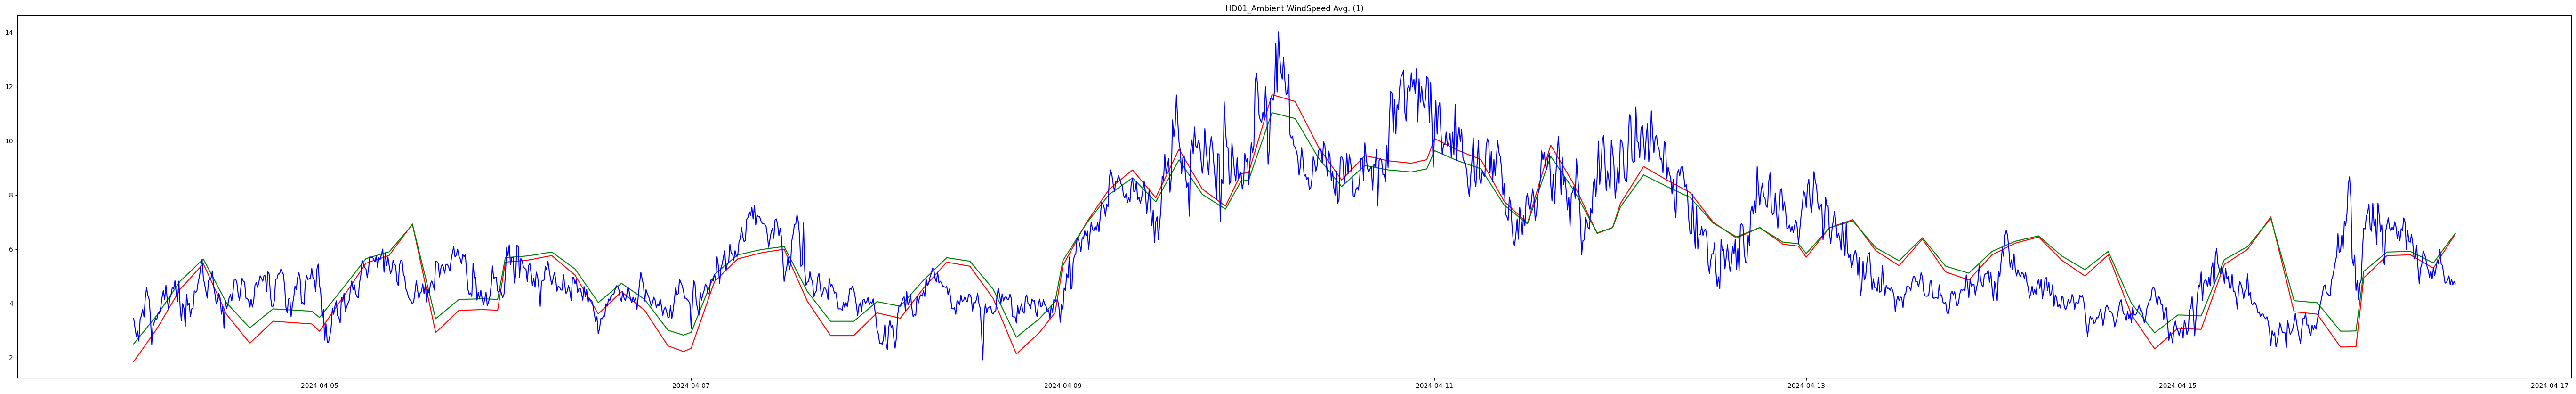

In [221]:
print("===== PLOT BETWEEN: GLASS_PREDICTED_WINDSPEED_MINUS_1_5 (RED) VS ADJUST_WINDSPEED (GREEN) VS ACTUAL_WINSPEED (BLUE) \n")

adjust_windspeeds = np.array(adjust_windspeeds)

plt.figure(1, figsize=(70, 10))
plt.plot(glass_wind_df["time"], glass_wind_df["noaa"]-1.5, "r")
plt.plot(glass_wind_df["time"], lasso_predictions, "g") 

plt.plot(real_wind_df["PCTimeStamp"], actual_windspeeds, "b")
plt.title("HD01_Ambient WindSpeed Avg. (1)")
plt.show()

#### Linear Regress

In [222]:
# IMPLEMENT LINEAR REGRESSION
print("======== IMPLEMENT LINEAR REGRESSION \n")

# Create feature X^2
X_squared = X**2

X_third = X**3

X_fourth = X**4

X_fifth = X**5

# Combine original feature and squared feature
X_extended = np.concatenate((X, X_squared, X_third, X_fourth, X_fifth), axis=1)

from sklearn.linear_model import LinearRegression
poly_model = LinearRegression()
poly_model.fit(X_extended, y)

# Get the coefficients (weights)
coefficients = poly_model.coef_

# Get the intercept
intercept = poly_model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

======== IMPLEMENT LINEAR REGRESSION 

Coefficients: [ 1.99029620e+01 -5.99316013e+00  8.33818853e-01 -5.30760687e-02
  1.26541511e-03]
Intercept: -20.531071178432278


In [223]:
lr_poly_predictions = poly_model.predict(X_extended)
lr_poly_predictions

array([4.08260161, 4.12195664, 4.1554496 , ..., 5.99971727, 6.09797081,
       6.19754998])

===== PLOT BETWEEN: GLASS_PREDICTED_WINDSPEED_MINUS_1_5 (RED) VS ADJUST_WINDSPEED (GREEN) VS ACTUAL_WINSPEED (BLUE) 



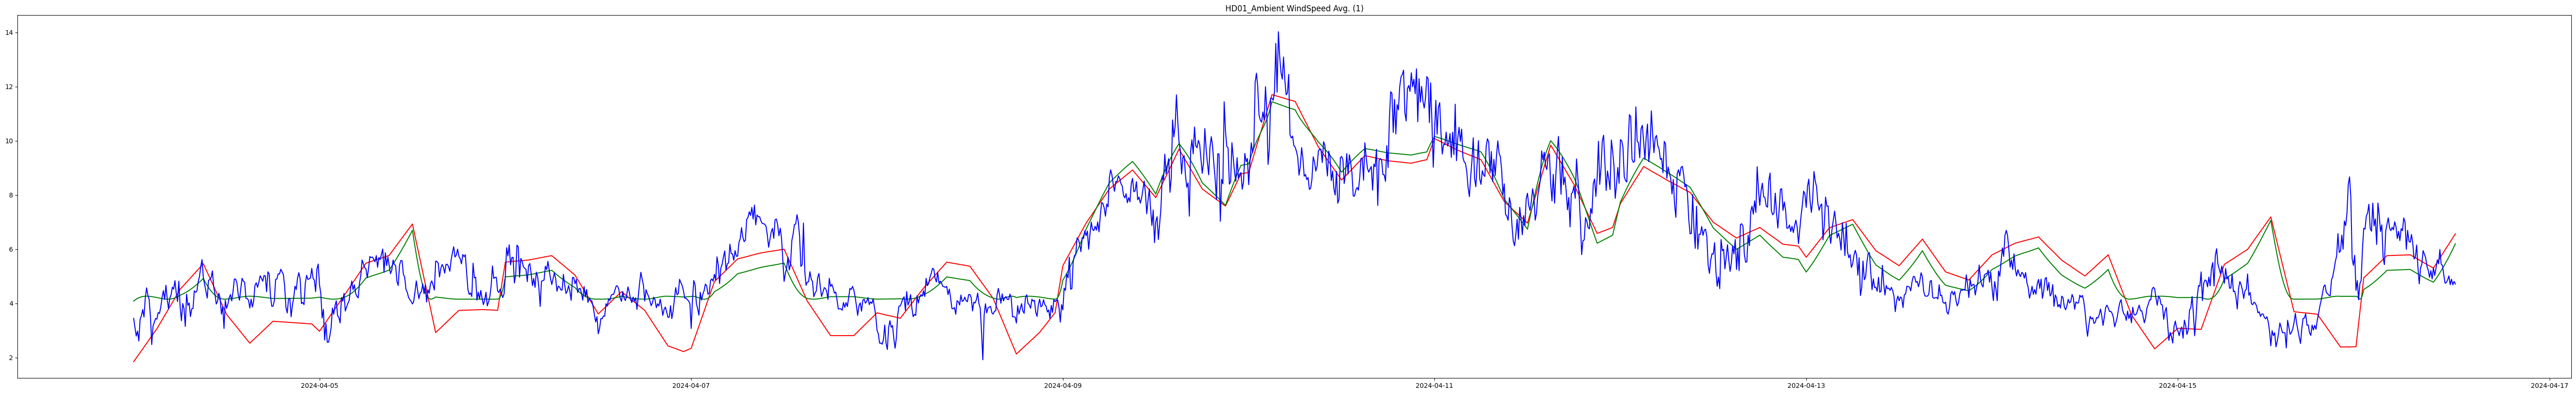

In [224]:
print("===== PLOT BETWEEN: GLASS_PREDICTED_WINDSPEED_MINUS_1_5 (RED) VS ADJUST_WINDSPEED (GREEN) VS ACTUAL_WINSPEED (BLUE) \n")

adjust_windspeeds = np.array(adjust_windspeeds)

plt.figure(1, figsize=(70, 10))
plt.plot(glass_wind_df["time"], glass_wind_df["noaa"]-1.5, "r")
plt.plot(glass_wind_df["time"], lr_poly_predictions, "g") 

plt.plot(real_wind_df["PCTimeStamp"], actual_windspeeds, "b")
plt.title("HD01_Ambient WindSpeed Avg. (1)")
plt.show()

In [225]:
print("===== MEASURE ACCURARY BETWEEN: LR_WINDSPEED_SQUARE VS ACTUAL_WINSPEED \n")

import numpy as np
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error (MSE)
windspeed_mse = mean_squared_error(actual_windspeeds, lr_poly_predictions)
print("Mean Squared Error (MSE):", windspeed_mse)

# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

windspeed_mape = mean_absolute_percentage_error(actual_windspeeds, lr_poly_predictions)
print("MAPE_POLY_3 = ", windspeed_mape)

windspeed_mape = mean_absolute_percentage_error(actual_windspeeds, predicted_windspeeds_minus_1_5)
print("MAPE_MINUS_1_5 = ", windspeed_mape)

partly_range = range(200,250)

windspeed_mape_minus_1_5 = mean_absolute_percentage_error(actual_windspeeds[partly_range], predicted_windspeeds_minus_1_5[partly_range])
print("\nMAPE_GLASS_MINUS_1_5_PARTLY = ", windspeed_mape_minus_1_5)

windspeed_mape_adjust = mean_absolute_percentage_error(actual_windspeeds[partly_range], adjust_windspeeds[partly_range])
print("MAPE_GLASS_ADJUSTED_PARTLY = ", windspeed_mape_adjust)

windspeed_mape_adjust = mean_absolute_percentage_error(actual_windspeeds[partly_range], y_predict_lr[partly_range])
print("LR_ADJUSTED_PARTLY = ", windspeed_mape_adjust)

windspeed_mape_adjust = mean_absolute_percentage_error(actual_windspeeds[partly_range], lr_poly_predictions[partly_range])
print("LR_POLY_ADJUSTED_PARTLY = ", windspeed_mape_adjust)

===== MEASURE ACCURARY BETWEEN: LR_WINDSPEED_SQUARE VS ACTUAL_WINSPEED 

Mean Squared Error (MSE): 1.211438927116144
MAPE_POLY_3 =  15.540421573724316
MAPE_MINUS_1_5 =  19.85113661840705

MAPE_GLASS_MINUS_1_5_PARTLY =  32.62453240448923
MAPE_GLASS_ADJUSTED_PARTLY =  34.57671791381376
LR_ADJUSTED_PARTLY =  29.981038372599656
LR_POLY_ADJUSTED_PARTLY =  21.40419745694067


#### Poly Linear Regression

In [226]:
# Create feature X^2
X_test_squared = X_test**2

X_test_third = X_test**3

X_test_fourth = X_test**4

X_test_fifth = X_test**5

# Combine original feature and squared feature
X_test_extended = np.concatenate((X_test, X_test_squared, X_test_third, X_test_fourth, X_test_fifth), axis=1)

lr_poly_predict_test = poly_model.predict(X_test_extended)
print(len(lr_poly_predict_test))

30


===== PLOT BETWEEN: GLASS_PREDICTED_WINDSPEED_MINUS_1_5 (RED) VS POLY_LINEAR_WINDSPEED (GREEN) VS ACTUAL_WINSPEED (BLUE) 



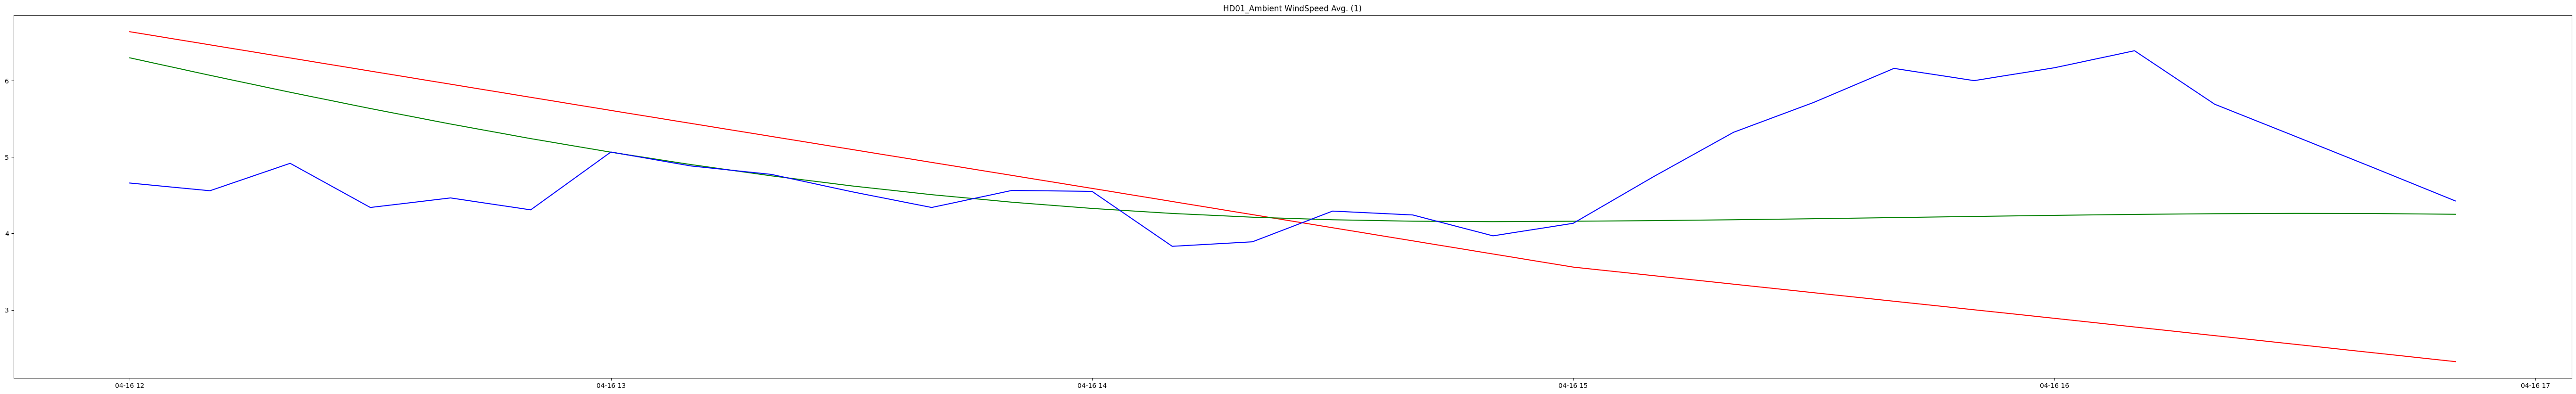

In [227]:
print("===== PLOT BETWEEN: GLASS_PREDICTED_WINDSPEED_MINUS_1_5 (RED) VS POLY_LINEAR_WINDSPEED (GREEN) VS ACTUAL_WINSPEED (BLUE) \n")

plt.figure(1, figsize=(70, 10))
plt.plot(test_glass_wind_df["time"], test_predicted_windspeeds-1.5, "r")
plt.plot(test_glass_wind_df["time"], lr_poly_predict_test, "g") 

plt.plot(test_real_wind_df["PCTimeStamp"], test_actual_windspeeds, "b")
plt.title("HD01_Ambient WindSpeed Avg. (1)")
plt.show()

In [228]:
print("===== MEASURE ACCURARY BETWEEN: LR_WINDSPEED_SQUARE VS ACTUAL_WINSPEED \n")

import numpy as np
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error (MSE)
windspeed_mse = mean_squared_error(test_actual_windspeeds, lr_poly_predict_test)
print("Mean Squared Error (MSE):", windspeed_mse)

# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

windspeed_mape = mean_absolute_percentage_error(test_actual_windspeeds, lr_poly_predict_test)
print("MAPE_POLY_3 = ", windspeed_mape)

windspeed_mape = mean_absolute_percentage_error(test_actual_windspeeds, test_predicted_windspeeds-1.5)
print("MAPE_MINUS_1_5 = ", windspeed_mape)

partly_range = range(0,20)

windspeed_mape_minus_1_5 = mean_absolute_percentage_error(test_actual_windspeeds[partly_range], (test_predicted_windspeeds-1.5)[partly_range])
print("\nMAPE_GLASS_MINUS_1_5_PARTLY = ", windspeed_mape_minus_1_5)

# windspeed_mape_adjust = mean_absolute_percentage_error(test_actual_windspeeds[partly_range], y_predict_lr[partly_range])
# print("LR_ADJUSTED_PARTLY = ", windspeed_mape_adjust)

windspeed_mape_adjust = mean_absolute_percentage_error(test_actual_windspeeds[partly_range], lr_poly_predict_test[partly_range])
print("LR_POLY_ADJUSTED_PARTLY = ", windspeed_mape_adjust)


===== MEASURE ACCURARY BETWEEN: LR_WINDSPEED_SQUARE VS ACTUAL_WINSPEED 

Mean Squared Error (MSE): 1.0817743625137213
MAPE_POLY_3 =  15.038327021655862
MAPE_MINUS_1_5 =  28.710479745170066

MAPE_GLASS_MINUS_1_5_PARTLY =  18.457922928273273
LR_POLY_ADJUSTED_PARTLY =  10.821910346616795


#### Random Forest

In [229]:
# For regression tasks
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor(n_estimators=5, max_depth=5)

forest_model.fit(X, y)
# forest_model.fit(X, y_stable)

forest_predictions = forest_model.predict(X)

In [230]:
y_stable

array([3.4665, 3.4665, 3.4665, ..., 4.684 , 4.809 , 4.715 ])

===== PLOT BETWEEN: GLASS_PREDICTED_WINDSPEED_MINUS_1_5 (RED) VS ADJUST_WINDSPEED (GREEN) VS ACTUAL_WINSPEED (BLUE) 



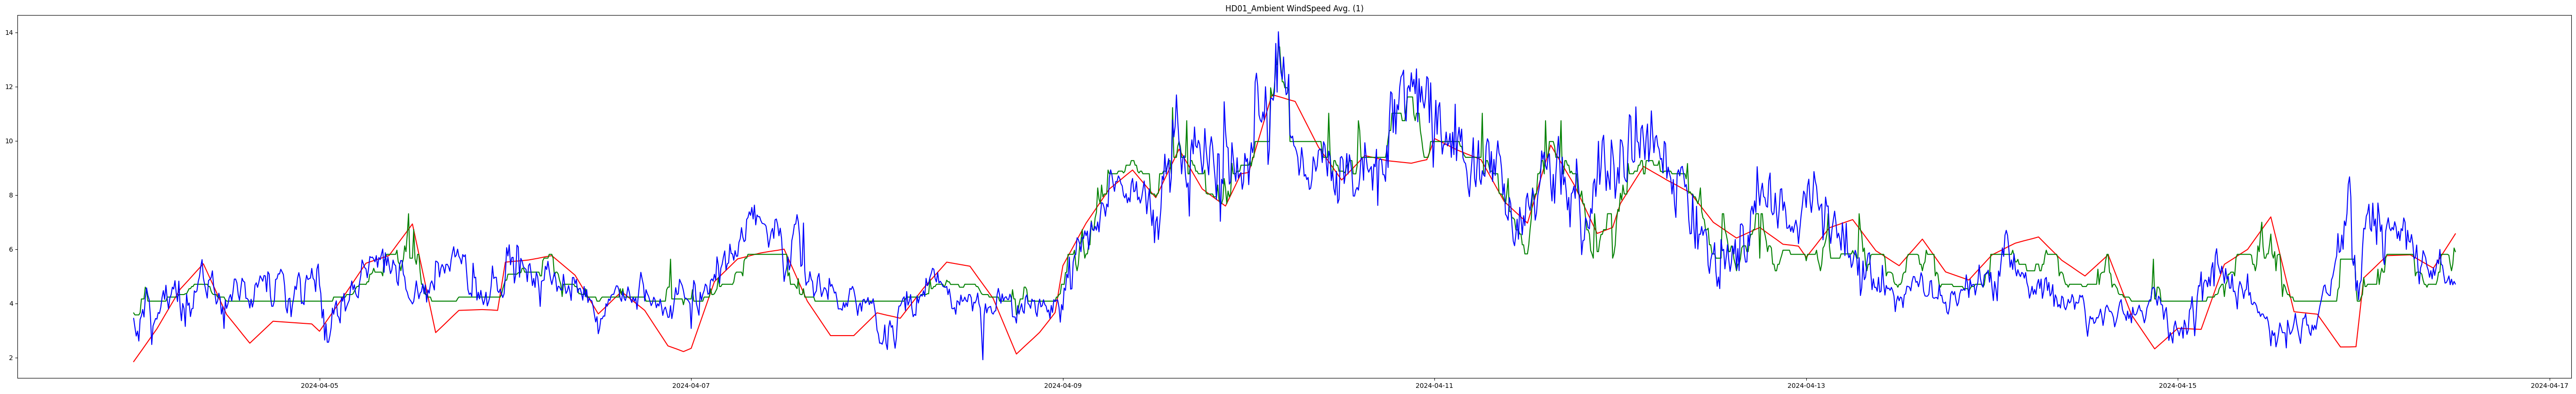

In [231]:
print("===== PLOT BETWEEN: GLASS_PREDICTED_WINDSPEED_MINUS_1_5 (RED) VS ADJUST_WINDSPEED (GREEN) VS ACTUAL_WINSPEED (BLUE) \n")

adjust_windspeeds = np.array(adjust_windspeeds)

plt.figure(1, figsize=(70, 10))
plt.plot(glass_wind_df["time"], glass_wind_df["noaa"]-1.5, "r")
plt.plot(glass_wind_df["time"], forest_predictions, "g") 

plt.plot(real_wind_df["PCTimeStamp"], actual_windspeeds, "b")
plt.title("HD01_Ambient WindSpeed Avg. (1)")
plt.show()

In [232]:
print("===== MEASURE ACCURARY BETWEEN: LR_WINDSPEED_SQUARE VS ACTUAL_WINSPEED \n")

import numpy as np
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error (MSE)
windspeed_mse = mean_squared_error(actual_windspeeds, forest_predictions)
print("Mean Squared Error (MSE):", windspeed_mse)

# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

windspeed_mape = mean_absolute_percentage_error(actual_windspeeds, forest_predictions)
print("MAPE_FOREST = ", windspeed_mape)

windspeed_mape = mean_absolute_percentage_error(actual_windspeeds, predicted_windspeeds_minus_1_5)
print("MAPE_MINUS_1_5 = ", windspeed_mape)


partly_range = range(0,100)

windspeed_mape_minus_1_5 = mean_absolute_percentage_error(actual_windspeeds[partly_range], predicted_windspeeds_minus_1_5[partly_range])
print("\nMAPE_GLASS_MINUS_1_5_PARTLY = ", windspeed_mape_minus_1_5)

windspeed_mape_adjust = mean_absolute_percentage_error(actual_windspeeds[partly_range], adjust_windspeeds[partly_range])
print("MAPE_GLASS_ADJUSTED_PARTLY = ", windspeed_mape_adjust)

windspeed_mape_adjust = mean_absolute_percentage_error(actual_windspeeds[partly_range], y_predict_lr[partly_range])
print("LR_ADJUSTED_PARTLY = ", windspeed_mape_adjust)

windspeed_mape_adjust = mean_absolute_percentage_error(actual_windspeeds[partly_range], lr_poly_predictions[partly_range])
print("LR_POLY_ADJUSTED_PARTLY = ", windspeed_mape_adjust)

windspeed_mape_adjust = mean_absolute_percentage_error(actual_windspeeds[partly_range], forest_predictions[partly_range])
print("FOREST_ADJUSTED_PARTLY = ", windspeed_mape_adjust)


===== MEASURE ACCURARY BETWEEN: LR_WINDSPEED_SQUARE VS ACTUAL_WINSPEED 

Mean Squared Error (MSE): 1.007737577877962
MAPE_FOREST =  14.521681849364551
MAPE_MINUS_1_5 =  19.85113661840705

MAPE_GLASS_MINUS_1_5_PARTLY =  21.80358099357703
MAPE_GLASS_ADJUSTED_PARTLY =  13.864151425534581
LR_ADJUSTED_PARTLY =  17.010750640994353
LR_POLY_ADJUSTED_PARTLY =  12.134767507592592
FOREST_ADJUSTED_PARTLY =  11.119117427008156


In [233]:
forest_predict_test = forest_model.predict(X_test)

===== PLOT BETWEEN: GLASS_PREDICTED_WINDSPEED_MINUS_1_5 (RED) VS FOREST_LINEAR (GREEN) VS ACTUAL_WINSPEED (BLUE) 



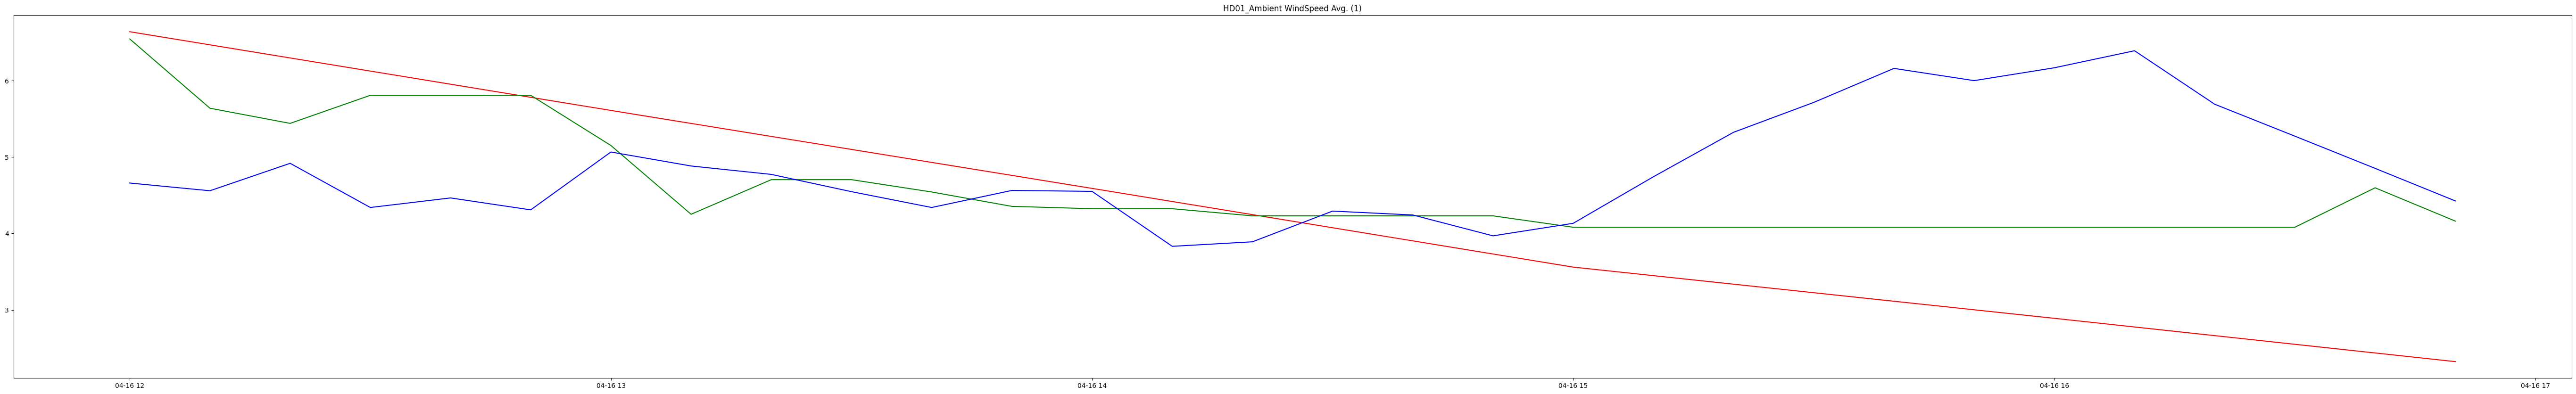

In [234]:
print("===== PLOT BETWEEN: GLASS_PREDICTED_WINDSPEED_MINUS_1_5 (RED) VS FOREST_LINEAR (GREEN) VS ACTUAL_WINSPEED (BLUE) \n")

plt.figure(1, figsize=(70, 10))
plt.plot(test_glass_wind_df["time"], test_predicted_windspeeds-1.5, "r")
plt.plot(test_glass_wind_df["time"], forest_predict_test, "g") 

plt.plot(test_real_wind_df["PCTimeStamp"], test_actual_windspeeds, "b")
plt.title("HD01_Ambient WindSpeed Avg. (1)")
plt.show()

In [235]:
print("===== MEASURE ACCURARY BETWEEN: FOREST_LINEAR VS ACTUAL_WINSPEED \n")

import numpy as np
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error (MSE)
windspeed_mse = mean_squared_error(test_actual_windspeeds, forest_predict_test)
print("Mean Squared Error (MSE):", windspeed_mse)

# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

windspeed_mape = mean_absolute_percentage_error(test_actual_windspeeds, forest_predict_test)
print("MAPE_FOREST = ", windspeed_mape)

windspeed_mape = mean_absolute_percentage_error(test_actual_windspeeds, test_predicted_windspeeds-1.5)
print("MAPE_MINUS_1_5 = ", windspeed_mape)

partly_range = range(0,10)

windspeed_mape_minus_1_5 = mean_absolute_percentage_error(test_actual_windspeeds[partly_range], (test_predicted_windspeeds-1.5)[partly_range])
print("\nMAPE_GLASS_MINUS_1_5_PARTLY = ", windspeed_mape_minus_1_5)

# windspeed_mape_adjust = mean_absolute_percentage_error(test_actual_windspeeds[partly_range], y_predict_lr[partly_range])
# print("LR_ADJUSTED_PARTLY = ", windspeed_mape_adjust)

windspeed_mape_adjust = mean_absolute_percentage_error(test_actual_windspeeds[partly_range], forest_predict_test[partly_range])
print("FOREST_ADJUSTED_PARTLY = ", windspeed_mape_adjust)

===== MEASURE ACCURARY BETWEEN: FOREST_LINEAR VS ACTUAL_WINSPEED 

Mean Squared Error (MSE): 1.2893627661809635
MAPE_FOREST =  16.730634043485974
MAPE_MINUS_1_5 =  28.710479745170066

MAPE_GLASS_MINUS_1_5_PARTLY =  26.576155114690437
FOREST_ADJUSTED_PARTLY =  19.296760623584987


#### Gradient Boosting

In [236]:
from sklearn.ensemble import GradientBoostingRegressor

gradient_boosting_reg = GradientBoostingRegressor(max_depth=5, n_estimators=30, learning_rate=0.5, random_state=42)
gradient_boosting_reg.fit(X, y)

gradient_boost_predictions = gradient_boosting_reg.predict(X)


===== PLOT BETWEEN: GLASS_PREDICTED_WINDSPEED_MINUS_1_5 (RED) VS GRADIENT_BOOSTING_WINDSPEED (GREEN) VS ACTUAL_WINSPEED (BLUE) 



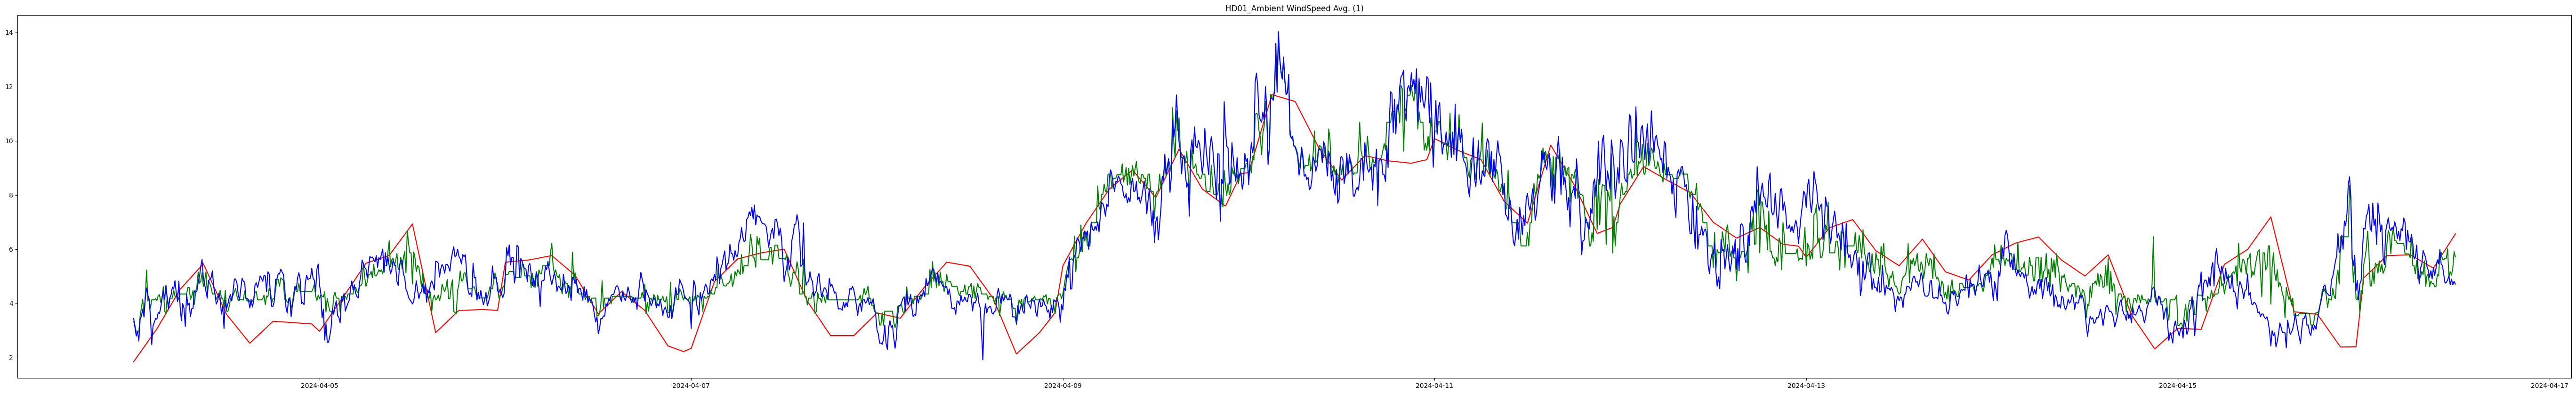

In [237]:
print("===== PLOT BETWEEN: GLASS_PREDICTED_WINDSPEED_MINUS_1_5 (RED) VS GRADIENT_BOOSTING_WINDSPEED (GREEN) VS ACTUAL_WINSPEED (BLUE) \n")

plt.figure(1, figsize=(70, 10))
plt.plot(glass_wind_df["time"], glass_wind_df["noaa"]-1.5, "r")
plt.plot(glass_wind_df["time"], gradient_boost_predictions, "g") 

plt.plot(real_wind_df["PCTimeStamp"], actual_windspeeds, "b")
plt.title("HD01_Ambient WindSpeed Avg. (1)")
plt.show()

In [238]:
print("===== MEASURE ACCURARY BETWEEN: GRADIENT_BOOSTING_WINDSPEED VS ACTUAL_WINSPEED \n")

import numpy as np
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error (MSE)
windspeed_mse = mean_squared_error(actual_windspeeds, gradient_boost_predictions)
print("Mean Squared Error (MSE):", windspeed_mse)

# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

windspeed_mape = mean_absolute_percentage_error(actual_windspeeds, gradient_boost_predictions)
print("MAPE_GRADIENT_BOOST = ", windspeed_mape)

windspeed_mape = mean_absolute_percentage_error(actual_windspeeds, predicted_windspeeds_minus_1_5)
print("MAPE_MINUS_1_5 = ", windspeed_mape)


partly_range = range(150,200)

windspeed_mape_minus_1_5 = mean_absolute_percentage_error(actual_windspeeds[partly_range], predicted_windspeeds_minus_1_5[partly_range])
print("\nMAPE_GLASS_MINUS_1_5_PARTLY = ", windspeed_mape_minus_1_5)

windspeed_mape_adjust = mean_absolute_percentage_error(actual_windspeeds[partly_range], adjust_windspeeds[partly_range])
print("MAPE_GLASS_ADJUSTED_PARTLY = ", windspeed_mape_adjust)

windspeed_mape_adjust = mean_absolute_percentage_error(actual_windspeeds[partly_range], y_predict_lr[partly_range])
print("LR_ADJUSTED_PARTLY = ", windspeed_mape_adjust)

windspeed_mape_adjust = mean_absolute_percentage_error(actual_windspeeds[partly_range], lr_poly_predictions[partly_range])
print("LR_POLY_ADJUSTED_PARTLY = ", windspeed_mape_adjust)

windspeed_mape_adjust = mean_absolute_percentage_error(actual_windspeeds[partly_range], forest_predictions[partly_range])
print("FOREST_ADJUSTED_PARTLY = ", windspeed_mape_adjust)

windspeed_mape_adjust = mean_absolute_percentage_error(actual_windspeeds[partly_range], gradient_boost_predictions[partly_range])
print("GRADIENT_BOOST_ADJUSTED_PARTLY = ", windspeed_mape_adjust)


===== MEASURE ACCURARY BETWEEN: GRADIENT_BOOSTING_WINDSPEED VS ACTUAL_WINSPEED 

Mean Squared Error (MSE): 0.6547561166302962
MAPE_GRADIENT_BOOST =  11.550271686703589
MAPE_MINUS_1_5 =  19.85113661840705

MAPE_GLASS_MINUS_1_5_PARTLY =  8.207651513948266
MAPE_GLASS_ADJUSTED_PARTLY =  16.549363007733113
LR_ADJUSTED_PARTLY =  12.571431000243088
LR_POLY_ADJUSTED_PARTLY =  11.88357874539004
FOREST_ADJUSTED_PARTLY =  12.253318934161564
GRADIENT_BOOST_ADJUSTED_PARTLY =  10.573972931942572


In [239]:
gradient_boost_predict_test = gradient_boosting_reg.predict(X_test)

===== PLOT BETWEEN: GLASS_PREDICTED_WINDSPEED_MINUS_1_5 (RED) VS GRADIENT_BOOSTING_WINDSPEED (GREEN) VS ACTUAL_WINSPEED (BLUE) 



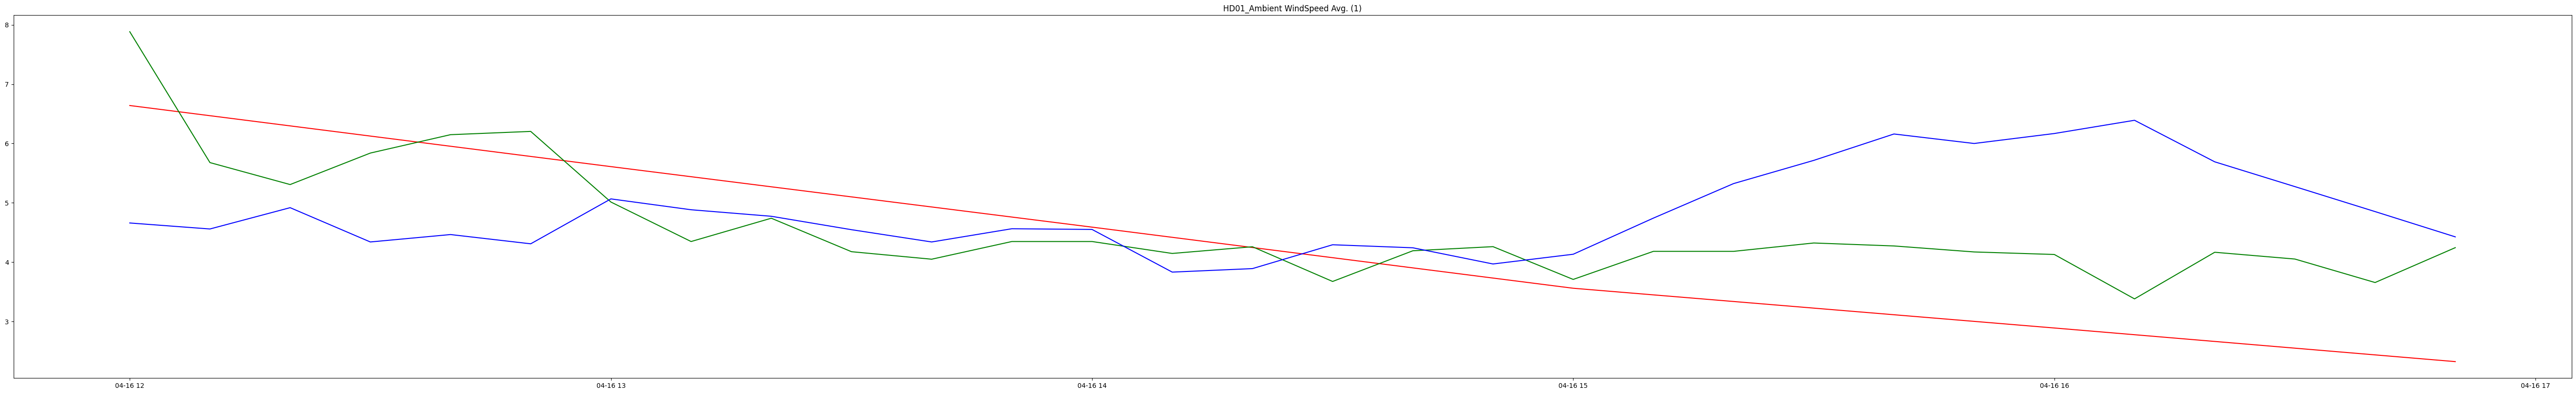

In [240]:
print("===== PLOT BETWEEN: GLASS_PREDICTED_WINDSPEED_MINUS_1_5 (RED) VS GRADIENT_BOOSTING_WINDSPEED (GREEN) VS ACTUAL_WINSPEED (BLUE) \n")

plt.figure(1, figsize=(70, 10))
plt.plot(test_glass_wind_df["time"], test_predicted_windspeeds-1.5, "r")
plt.plot(test_glass_wind_df["time"], gradient_boost_predict_test, "g") 

plt.plot(test_real_wind_df["PCTimeStamp"], test_actual_windspeeds, "b")
plt.title("HD01_Ambient WindSpeed Avg. (1)")
plt.show()

In [241]:
print("===== MEASURE ACCURARY BETWEEN: FOREST_LINEAR VS ACTUAL_WINSPEED \n")

import numpy as np
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error (MSE)
windspeed_mse = mean_squared_error(test_actual_windspeeds, gradient_boost_predict_test)
print("Mean Squared Error (MSE):", windspeed_mse)

# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

windspeed_mape = mean_absolute_percentage_error(test_actual_windspeeds, gradient_boost_predict_test)
print("MAPE_GRADIENT_BOOST = ", windspeed_mape)

windspeed_mape = mean_absolute_percentage_error(test_actual_windspeeds, test_predicted_windspeeds-1.5)
print("MAPE_MINUS_1_5 = ", windspeed_mape)

partly_range = range(0,10)

windspeed_mape_minus_1_5 = mean_absolute_percentage_error(test_actual_windspeeds[partly_range], (test_predicted_windspeeds-1.5)[partly_range])
print("\nMAPE_GLASS_MINUS_1_5_PARTLY = ", windspeed_mape_minus_1_5)

# windspeed_mape_adjust = mean_absolute_percentage_error(test_actual_windspeeds[partly_range], y_predict_lr[partly_range])
# print("LR_ADJUSTED_PARTLY = ", windspeed_mape_adjust)

windspeed_mape_adjust = mean_absolute_percentage_error(test_actual_windspeeds[partly_range], forest_predict_test[partly_range])
print("FOREST_ADJUSTED_PARTLY = ", windspeed_mape_adjust)

windspeed_mape_adjust = mean_absolute_percentage_error(test_actual_windspeeds[partly_range], gradient_boost_predict_test[partly_range])
print("GRADIENT_BOOST_ADJUSTED_PARTLY = ", windspeed_mape_adjust)

===== MEASURE ACCURARY BETWEEN: FOREST_LINEAR VS ACTUAL_WINSPEED 

Mean Squared Error (MSE): 1.6970023170169533
MAPE_GRADIENT_BOOST =  19.43625634713387
MAPE_MINUS_1_5 =  28.710479745170066

MAPE_GLASS_MINUS_1_5_PARTLY =  26.576155114690437
FOREST_ADJUSTED_PARTLY =  19.296760623584987
GRADIENT_BOOST_ADJUSTED_PARTLY =  23.870223443405013


### Data Visualization For Meteo Forecast API

In [242]:
# LOAD FROM CSV TO PANDAS
meteo_wind_df = pd.read_csv('csv/meteo_forcast_100m.csv')

# SHOW DATA
meteo_wind_df.head(5)

time  meteo
0  2024-04-05T00:00:00+00:00   3.82
1  2024-04-05T01:00:00+00:00   4.27
2  2024-04-05T02:00:00+00:00   4.30
3  2024-04-05T03:00:00+00:00   4.56
4  2024-04-05T04:00:00+00:00   5.66

In [243]:
# PREPROCESS: CONVERT DATETIME TYPE, TIMEZONE, NUMERIC TYPE

# Convert to time field to datetime type
meteo_wind_df['time'] = pd.to_datetime(meteo_wind_df['time'])

# Convert some columns to numeric type
numeric_columns = ['meteo']
meteo_wind_df[numeric_columns] = meteo_wind_df[numeric_columns].apply(pd.to_numeric, errors='coerce', axis=1)

In [244]:
# CHECK TYPE OF ALL COLUMNS
meteo_wind_df.dtypes

time     datetime64[ns, UTC]
meteo                float64
dtype: object

In [245]:
# SHOW DATA AFTER PREPROCESSING
meteo_wind_df.head(5)

time  meteo
0 2024-04-05 00:00:00+00:00   3.82
1 2024-04-05 01:00:00+00:00   4.27
2 2024-04-05 02:00:00+00:00   4.30
3 2024-04-05 03:00:00+00:00   4.56
4 2024-04-05 04:00:00+00:00   5.66

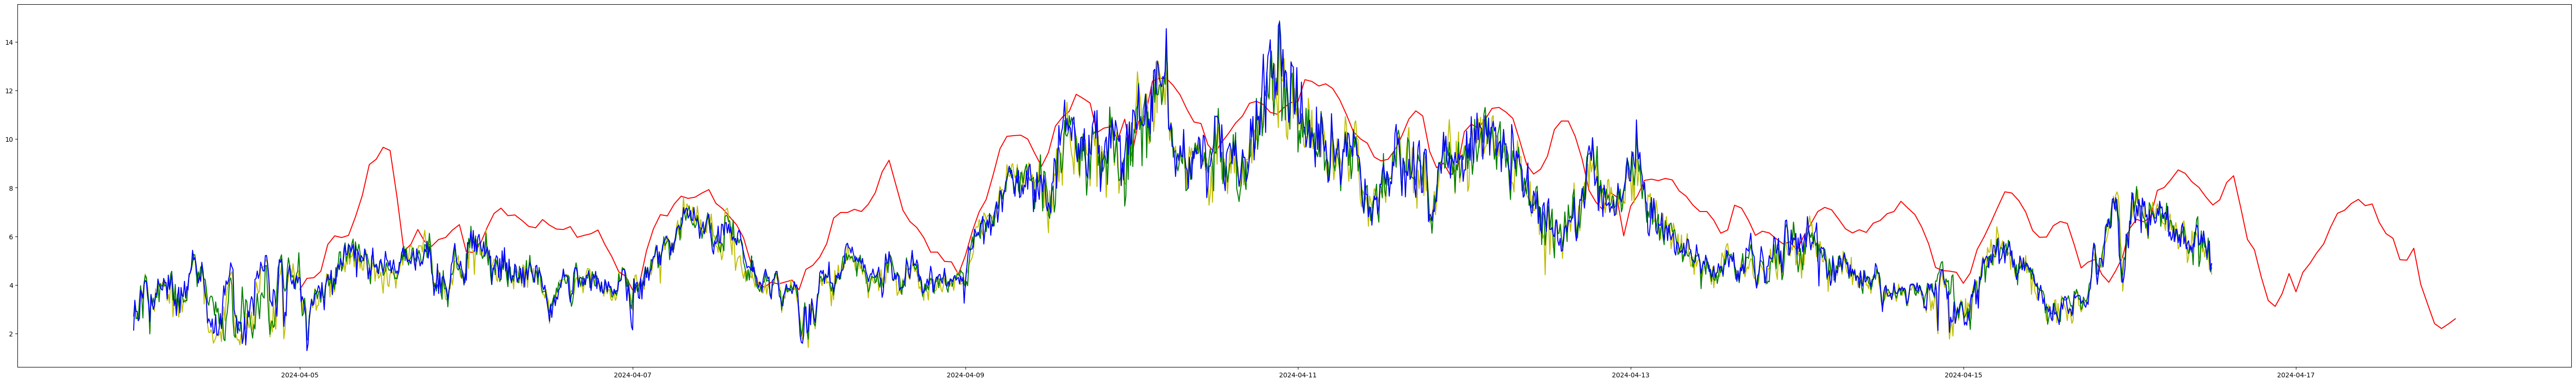

In [246]:
# VISUALIZE REAL DATA OF WINDSPEED ON TUABINS

plt.figure(1, figsize=(70, 10))
# plt.plot(meteo_wind_df["time"], meteo_wind_df["meteo"], "r")
plt.plot(meteo_wind_df["time"], meteo_wind_df["meteo"], "r")

plt.plot(real_wind_df["PCTimeStamp"], real_wind_df["HD02_Ambient WindSpeed Avg. (2)"], "y")
plt.plot(real_wind_df["PCTimeStamp"], real_wind_df["HD03_Ambient WindSpeed Avg. (3)"], "g")
plt.plot(real_wind_df["PCTimeStamp"], real_wind_df["HD04_Ambient WindSpeed Avg. (4)"], "b")
plt.show()